<div style="background-color: darkslategray; color: white; padding: 15px; border-radius: 8px;">
    <center><h1 style="font-family: Arial, sans-serif;">TO GRANT OR NOT TO GRANT: DECIDING ON COMPENSATION BENEFITS</h1></center>
    <center><h3 style="font-family: Arial, sans-serif;">Machine Learning Project</h3></center>
</div>

# Table of Contents

1. [Environment Setup](#environment-setup)
   - 1.1 [Importing Libraries](#importing-libraries)
   - 1.2 [Importing the Data Set](#importing-the-data-set)

2. [Exploratory Data Analysis](#exploratory-data-analysis)
   - 2.1 [General Analysis of the Data Set](#general-analysis-of-the-data-set)
   - 2.2 [Descriptive Statistics](#descriptive-statistics)
   - 2.3 [Incoherencies](#incoherencies)
   - 2.4 [Visual Exploration](#visual-exploration)

3. [Data Cleaning](#data-cleaning)
   - 3.1 [Empty Rows](#empty-rows)
   - 3.2 [Split the Train Data](#split-the-train-data)
   - 3.3 [Duplicates](#duplicates)
   - 3.4 [Data Type Conversion](#data-type-conversion)
   - 3.5 [Empty Features](#empty-features)

4. [Data Pre-Processing](#data-pre-processing)
   - 4.1 [Missing Values](#missing-values)
   - 4.2 [Outliers](#outliers)
   - 4.3 [Data Scaling](#data-scaling)
   - 4.4 [Encoding](#encoding)

5. [Feature Selection](#feature-selection)
   - 5.1 [RFECV with Random Forests](#rfecv-with-random-forests)
   - 5.2 [RFECV with Logistic Regression](#rfecv-with-logistic-regression)

6. [Models](#models)
   - 6.1 [Random Forest](#random-forest)
   - 6.2 [Logistic Regression](#logistic-regression)


# 1. Environment Setup

## 1.1 Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.calibration import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, make_scorer

## 1.2 Importing the data set

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
train_data = pd.read_csv('train_data.csv', index_col='Claim Identifier')
test_data = pd.read_csv('test_data.csv', index_col='Claim Identifier')

train_data['Claim Injury Type'].isna().sum()

C:\Users\timst\AppData\Local\Temp\ipykernel_35592\137276350.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train_data.csv', index_col='Claim Identifier')


19445

# 2. Exploratory Data Analysis

## 2.1 General analysis of the data set

In [4]:
train_data.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
957648180,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [5]:
train_data.tail()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
327160035,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6165075,2022-12-13,72.0,N,2022-12-31,N,0.0,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,2. NON-COMP,SULLIVAN,N,BINGHAMTON,NaN,F,NaN,48.0,TRANSPORTATION AND WAREHOUSING,I,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
249875936,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120584215,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
818961390,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
train_data.shape

(593471, 32)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type     

In [8]:
train_data.describe(include='all')

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
count,570337,574026.000000,574026,593471,574026,5.453750e+05,544948.000000,559466,187245,574026,574026,574026,574026,574026,574026,150798,574026,132803.000000,564068.000000,564068,574026,0.0,558386.000000,558386,558369.000000,558369,556944.000000,556944,545389,574026.000000,574026,574026.000000
unique,5539,NaN,3,1096,2,NaN,NaN,2475,1648,2046,8,8,63,2,8,1094,4,NaN,NaN,20,5,NaN,NaN,74,NaN,56,NaN,54,10060,NaN,1,NaN
top,2020-03-01,NaN,N,2020-03-06,N,NaN,NaN,2021-05-11,2021-04-21,STATE INSURANCE FUND,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,NYC,2022-04-15,M,NaN,NaN,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,NaN,LIFTING,NaN,STRAIN OR TEAR,NaN,LOWER BACK AREA,11236,NaN,Not Work Related,NaN
freq,1245,NaN,571412,1422,392291,NaN,NaN,1847,350,111144,285368,291078,60430,546505,270779,440,335218,NaN,NaN,114339,265981,NaN,NaN,46610,NaN,153373,NaN,51862,3302,NaN,574026,NaN
mean,NaN,42.114270,NaN,NaN,NaN,4.910883e+02,1886.767604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.207337,58.645305,NaN,NaN,NaN,54.381143,NaN,41.013839,NaN,39.738146,NaN,NaN,0.046665,NaN,3.006559
std,NaN,14.256432,NaN,NaN,NaN,6.092918e+03,414.644423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.832303,19.644175,NaN,NaN,NaN,25.874281,NaN,22.207521,NaN,22.365940,NaN,NaN,0.210921,NaN,2.000801
min,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,11.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,-9.000000,NaN,NaN,0.000000,NaN,0.000000
25%,NaN,31.000000,NaN,NaN,NaN,0.000000e+00,1965.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,45.000000,NaN,NaN,NaN,31.000000,NaN,16.000000,NaN,33.000000,NaN,NaN,0.000000,NaN,1.000000
50%,NaN,42.000000,NaN,NaN,NaN,0.000000e+00,1977.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,61.000000,NaN,NaN,NaN,56.000000,NaN,49.000000,NaN,38.000000,NaN,NaN,0.000000,NaN,3.000000
75%,NaN,54.000000,NaN,NaN,NaN,8.410000e+02,1989.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,71.000000,NaN,NaN,NaN,75.000000,NaN,52.000000,NaN,53.000000,NaN,NaN,0.000000,NaN,5.000000


## 2.2 Descriptive Statistics

### Data Types

In [9]:
# Get the data type of each column in train_data
data_types = train_data.dtypes

# Calculate the percentage of each data type
data_type_counts = data_types.value_counts()
data_type_percentages = (data_type_counts / len(data_types)) * 100


print("\nPercentage of each data type in the dataset:")
print(data_type_percentages)


Percentage of each data type in the dataset:
object     65.625
float64    34.375
Name: count, dtype: float64


### Missing Values Per Feature

In [10]:
train_data.isnull().sum()/len(train_data)*100

Accident Date                           3.898084
Age at Injury                           3.276487
Alternative Dispute Resolution          3.276487
Assembly Date                           0.000000
Attorney/Representative                 3.276487
Average Weekly Wage                     8.104187
Birth Year                              8.176137
C-2 Date                                5.729850
C-3 Date                               68.449174
Carrier Name                            3.276487
Carrier Type                            3.276487
Claim Injury Type                       3.276487
County of Injury                        3.276487
COVID-19 Indicator                      3.276487
District Name                           3.276487
First Hearing Date                     74.590502
Gender                                  3.276487
IME-4 Count                            77.622664
Industry Code                           4.954412
Industry Code Description               4.954412
Medical Fee Region  

Observations:

OIICS Nature of Injury Description has no values

IME-4 Count, First Hearing Date and C-3 Date have >50% of entries missing ( 77.6%, 74.5 and 68.4%, respectively)

### Unique Values Per Feature

In [11]:
train_data.nunique()


Accident Date                           5539
Age at Injury                            108
Alternative Dispute Resolution             3
Assembly Date                           1096
Attorney/Representative                    2
Average Weekly Wage                   120024
Birth Year                               107
C-2 Date                                2475
C-3 Date                                1648
Carrier Name                            2046
Carrier Type                               8
Claim Injury Type                          8
County of Injury                          63
COVID-19 Indicator                         2
District Name                              8
First Hearing Date                      1094
Gender                                     4
IME-4 Count                               41
Industry Code                             24
Industry Code Description                 20
Medical Fee Region                         5
OIICS Nature of Injury Description         0
WCIO Cause

Observation:

Some categorical variables that only present 2 unique values, usually '1s and 0s' or 'Y or N' could be changed to boolean. Since we are not doing data pre-processing yet, these changes would have to preserve any NaN data. The variables are:
- Agreement Reached (0s and 1s)
- Attorney/Representative (Y or N)
- COVID-19 Indicator (Y or N)

## 2.3 Incoherencies

#### Dates

In [12]:

# Define logical ordering of dates in a list of tuples (preceding_date, following_date)
date_order = [
    ('Accident Date', 'C-2 Date'),
    ('Assembly Date', 'First Hearing Date'), 
]

# Check for date incoherences
incoherences = []

for preceding, following in date_order:
    # Ensure the columns are in datetime format (if not already)
    if not pd.api.types.is_datetime64_any_dtype(train_data[preceding]):
        train_data[preceding] = pd.to_datetime(train_data[preceding], errors='coerce')
    if not pd.api.types.is_datetime64_any_dtype(train_data[following]):
        train_data[following] = pd.to_datetime(train_data[following], errors='coerce')

    # Find rows where the preceding date is after the following date
    incoherent_rows = train_data[train_data[preceding] > train_data[following]]
    
    # Append results with details on the incoherence
    if not incoherent_rows.empty:
        incoherences.append({
            'preceding_date': preceding,
            'following_date': following,
            'incoherent_count': len(incoherent_rows),
            'incoherent_rows': incoherent_rows[[preceding, following]]
        })

# Display the results
for incoherence in incoherences:
    print(f"Incoherence found between {incoherence['preceding_date']} and {incoherence['following_date']}")
    print(f"Number of incoherent rows: {incoherence['incoherent_count']}")
    print(incoherence['incoherent_rows'])
    print("\n")

Incoherence found between Accident Date and C-2 Date
Number of incoherent rows: 982
                 Accident Date   C-2 Date
Claim Identifier                         
5394177             2019-12-24 2019-07-31
5393953             2020-02-26 2019-12-31
5394099             2020-01-23 2020-01-14
5393830             2020-03-01 2020-01-17
5394613             2020-01-27 2020-01-15
...                        ...        ...
6156163             2023-01-26 2022-12-16
6158378             2022-12-27 2022-12-20
6160613             2023-02-07 2022-12-22
6162010             2023-02-02 2022-12-26
6162263             2022-12-28 2022-12-26

[982 rows x 2 columns]




Found 982 Incoherences where the C-2 Date is earlier than the date of the accident. No incoherences between Assembly Date and First Hearing Date.

#### Age at Injury and Birth Year

In [13]:
# Ensure 'Birth Year' and 'Accident Date' columns are in the correct formats
if not pd.api.types.is_datetime64_any_dtype(train_data['Accident Date']):
    train_data['Accident Date'] = pd.to_datetime(train_data['Accident Date'], errors='coerce')

# Filter out rows where 'Birth Year' is 0
filtered_data = train_data[(train_data['Birth Year'] != 0 ) & (train_data['Age at Injury'] != 0)]

# Calculate expected age at the time of injury based on 'Birth Year' and 'Accident Date'
expected_age = filtered_data['Accident Date'].dt.year - filtered_data['Birth Year']

# Find incoherences where 'Age at Injury' does not match the calculated 'expected_age'
# Allow a margin of error of 1 year for any minor discrepancies
incoherent_rows = filtered_data[(filtered_data['Age at Injury'] < expected_age - 1) | 
                                (filtered_data['Age at Injury'] > expected_age + 1)]

# Count and print the results
incoherent_count = len(incoherent_rows)
print(f"Number of incoherent rows between 'Age at Injury' and 'Birth Year' (excluding 'Birth Year' = 0): {incoherent_count}")

# Optional: Display a sample of the incoherent rows for inspection
print(incoherent_rows[['Birth Year', 'Accident Date', 'Age at Injury']].head())

Number of incoherent rows between 'Age at Injury' and 'Birth Year' (excluding 'Birth Year' = 0): 0
Empty DataFrame
Columns: [Birth Year, Accident Date, Age at Injury]
Index: []


No incoherence between Age at injury and Birth Year for all non zero values. (With a margin of 1 year)

Check for Ages at injury that are below 14 (minimum Age for working in the USA)

In [14]:
# Filter rows where 'Age at Injury' is below 14
underage_rows = train_data[(train_data['Age at Injury'] < 14) & (train_data['Age at Injury'] != 0)]

# Count the number of underage cases
underage_count = len(underage_rows)
print(f"Number of cases where 'Age at Injury' is below 14: {underage_count}")

# Optional: Display a sample of these rows for inspection
print(underage_rows[['Birth Year', 'Accident Date', 'Age at Injury']].head())

Number of cases where 'Age at Injury' is below 14: 47
                  Birth Year Accident Date  Age at Injury
Claim Identifier                                         
5399005                  0.0    2019-12-29           11.0
5412625               2018.0    2020-01-09            1.0
5412736               2018.0    2020-01-09            1.0
5412861               2009.0    2020-01-17           10.0
5453057               1997.0    2002-03-06            5.0


47 incoherent entries

## 2.4 Visual Exploration

#### Numerical Feature Correlation

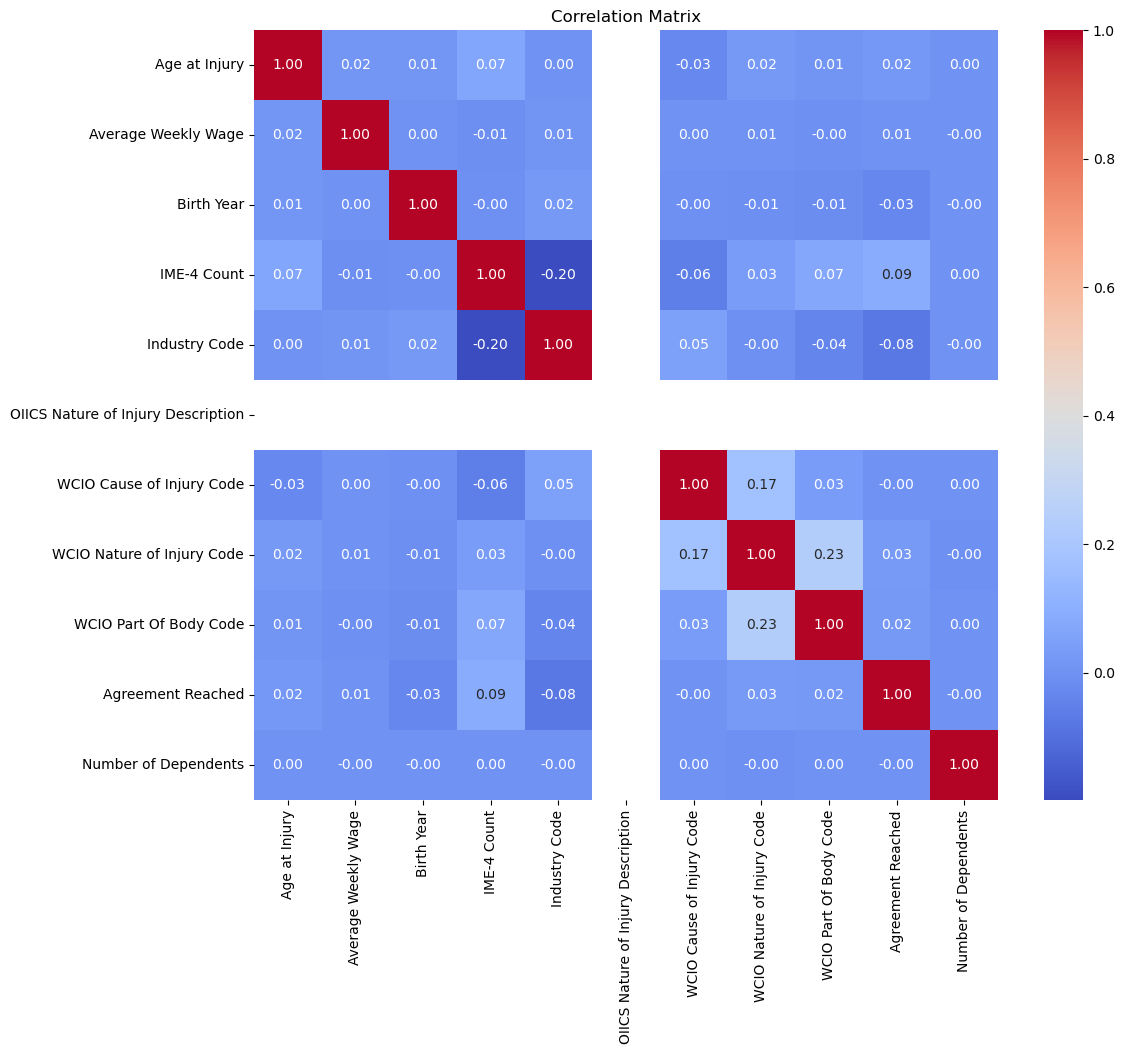

In [15]:
# Filter the dataframe to include only integer and float columns
numeric_train_data = train_data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_train_data.corr()

# Plot the correlation matrix using matplotlib
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

No significant correlations between features

#### Outliers

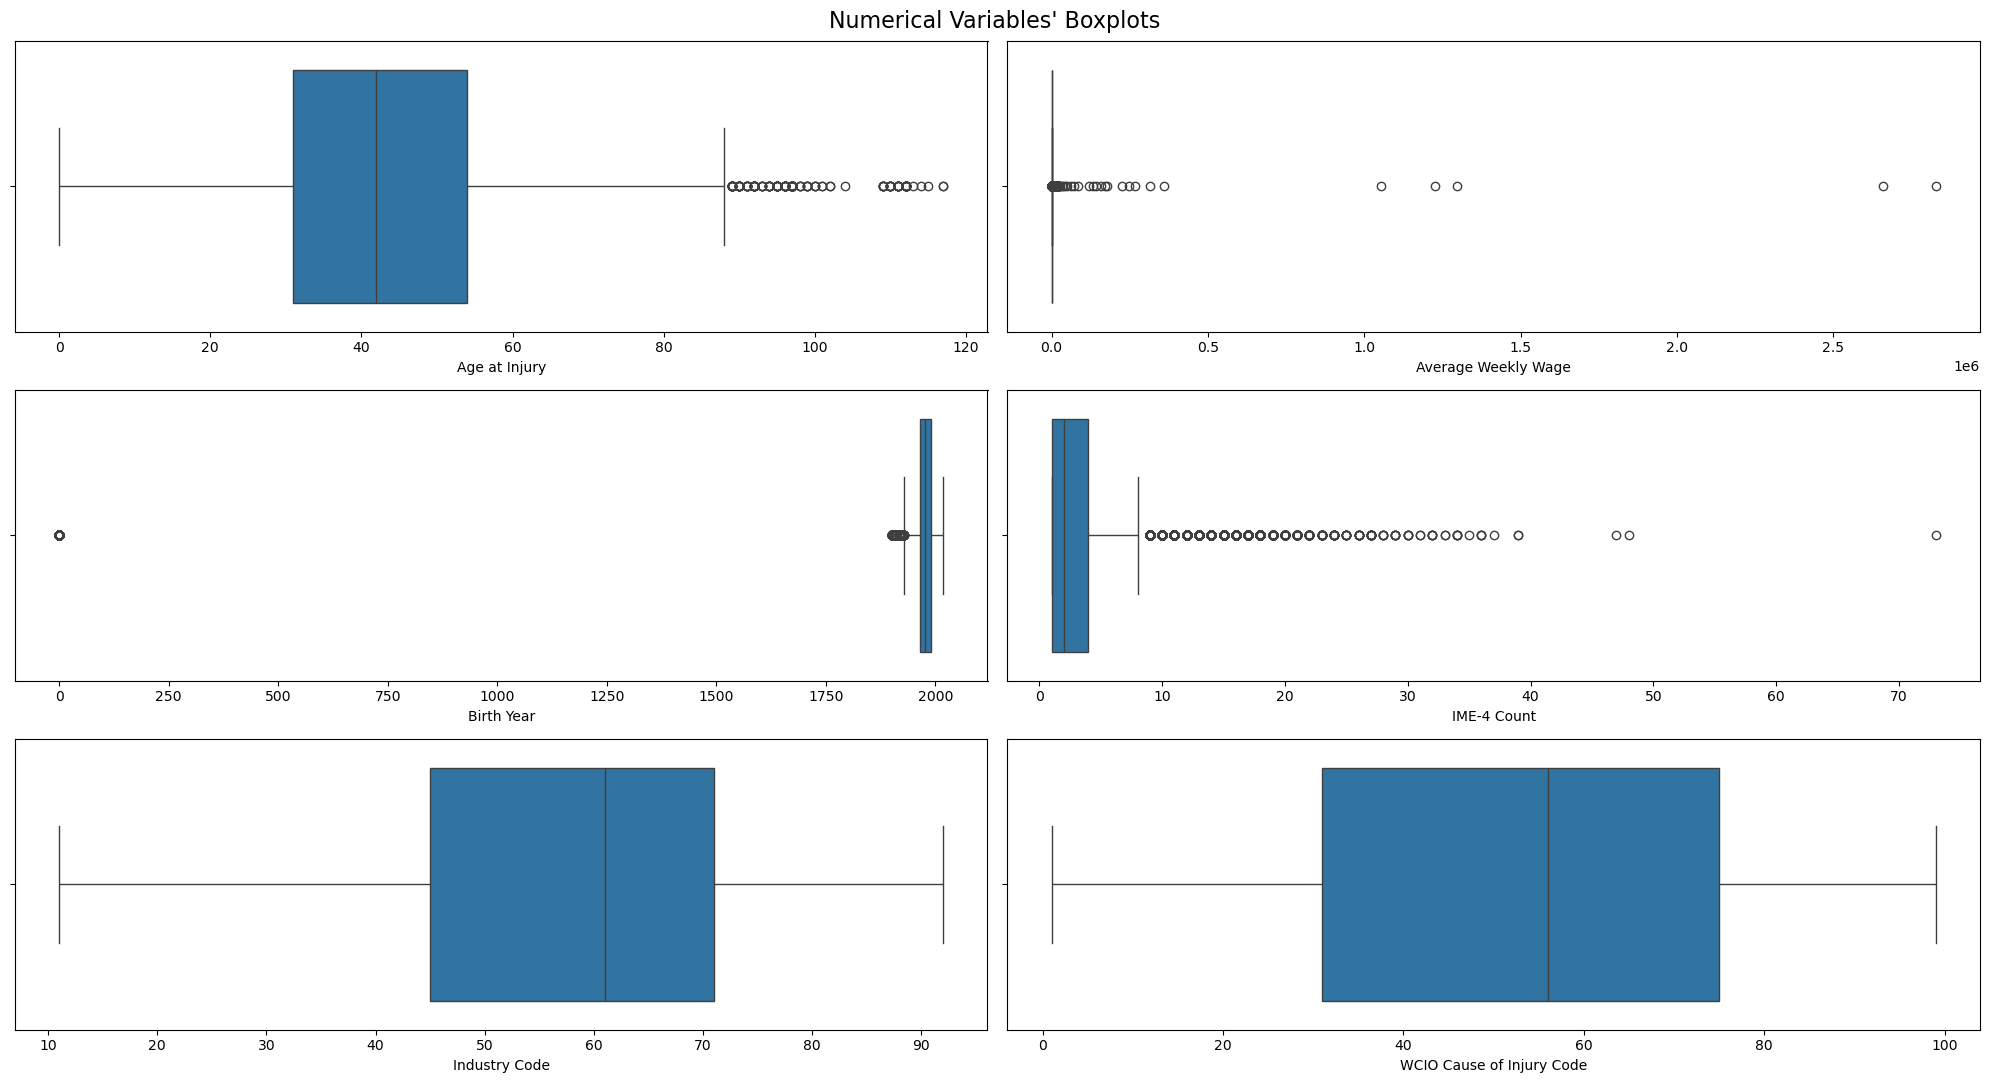

In [16]:
numeric_train_data = numeric_train_data.dropna(axis=1, how='all')

sp_rows = 3
sp_cols = 2

fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11), tight_layout=True)

features = numeric_train_data.select_dtypes(include=['number']).columns.tolist()

for ax, feat in zip(axes.flatten(), features):
    sns.boxplot(x=numeric_train_data[feat], ax=ax)

title = "Numerical Variables' Boxplots"
plt.suptitle(title, fontsize=16) 
plt.show()

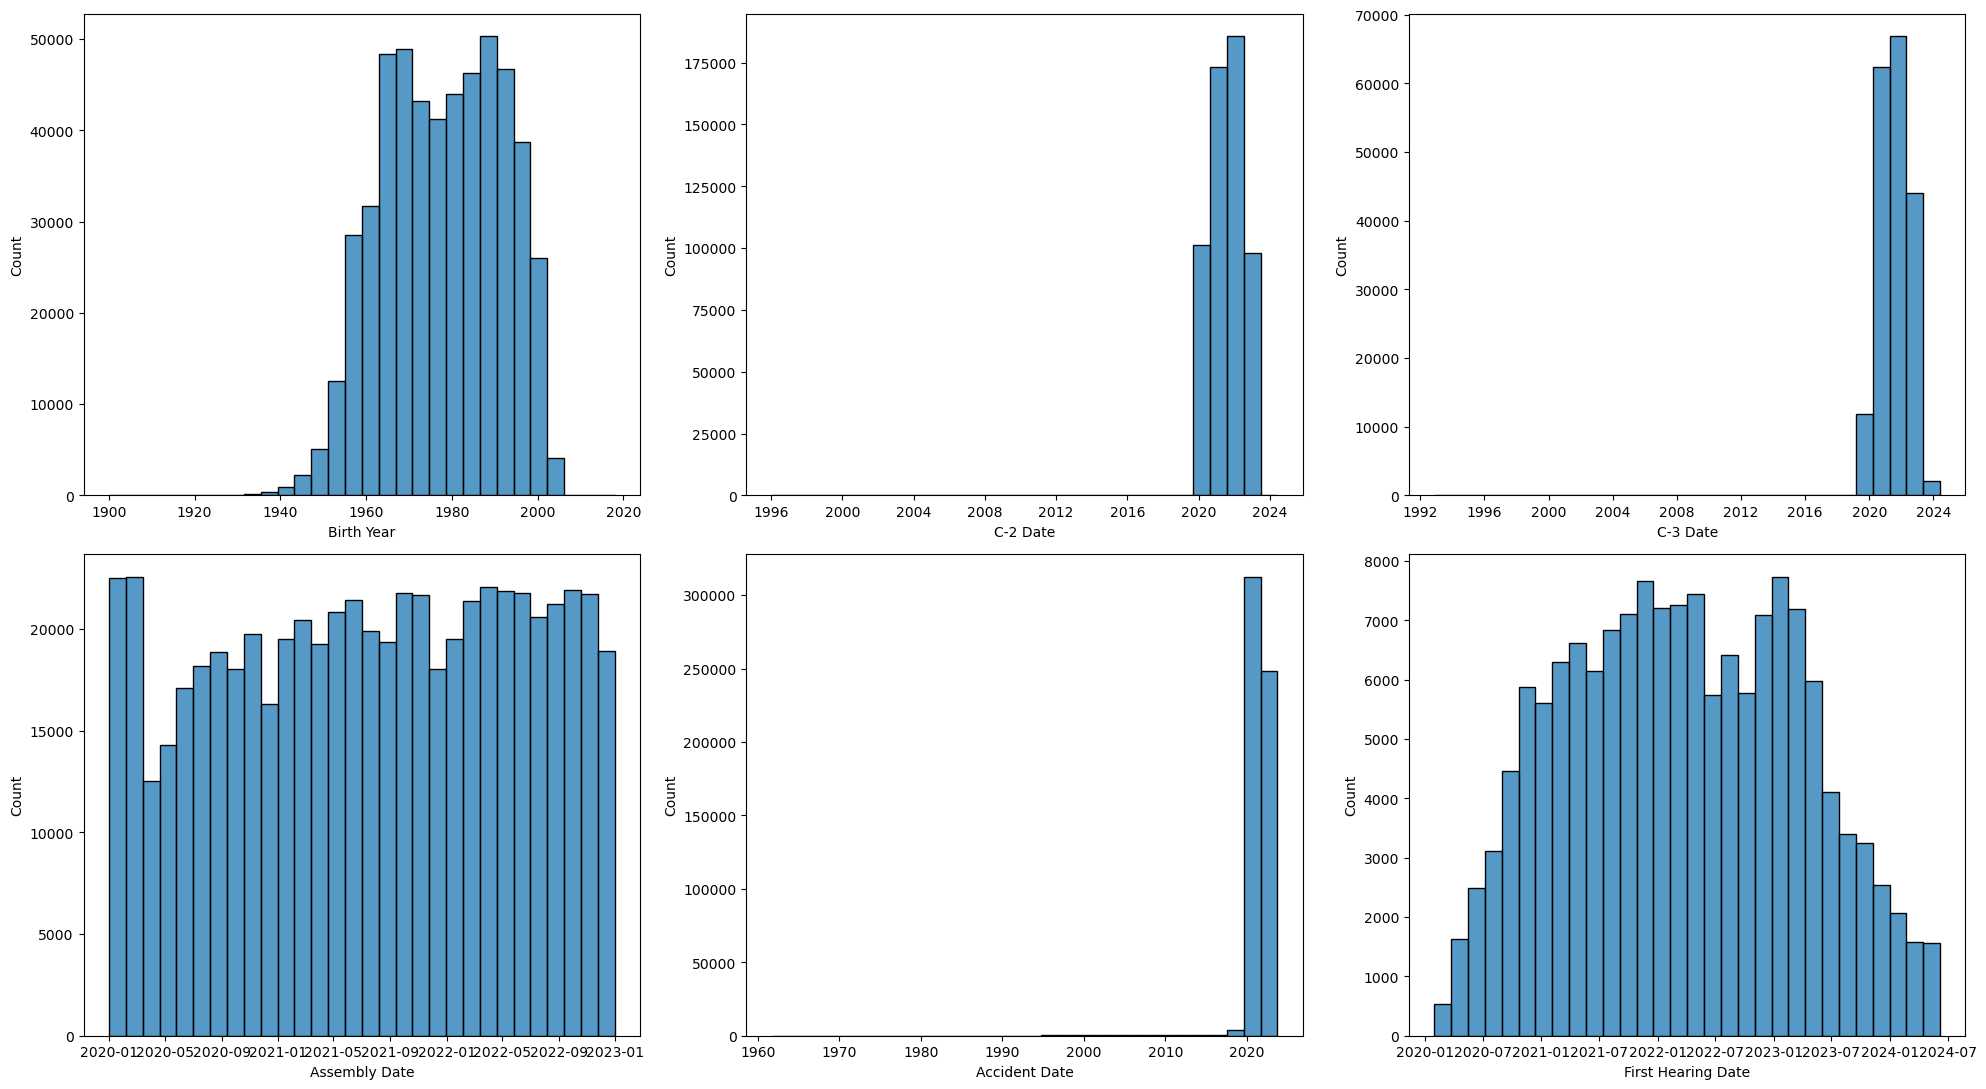

In [17]:
outlier_date = train_data.copy()
for col in outlier_date.columns:
    if 'Date' in col:
        outlier_date[col] = pd.to_datetime(outlier_date[col], format='%Y-%m-%d')
    elif 'Year' in col:
        outlier_date[col] = outlier_date[col].replace(0.0, np.nan)
        outlier_date[col] = pd.to_datetime(outlier_date[col].dropna().astype(int).astype(str), format='%Y', errors='coerce')

features = ['Birth Year','C-2 Date','C-3 Date','Assembly Date','Accident Date','First Hearing Date']

sp_rows = 2
sp_cols = 3

fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11), tight_layout=True)

for ax, feat in zip(axes.flatten(), features):
    sns.histplot(outlier_date[feat], ax=ax, bins=30)


title = "Datetime Variables' Histograms"

plt.show()

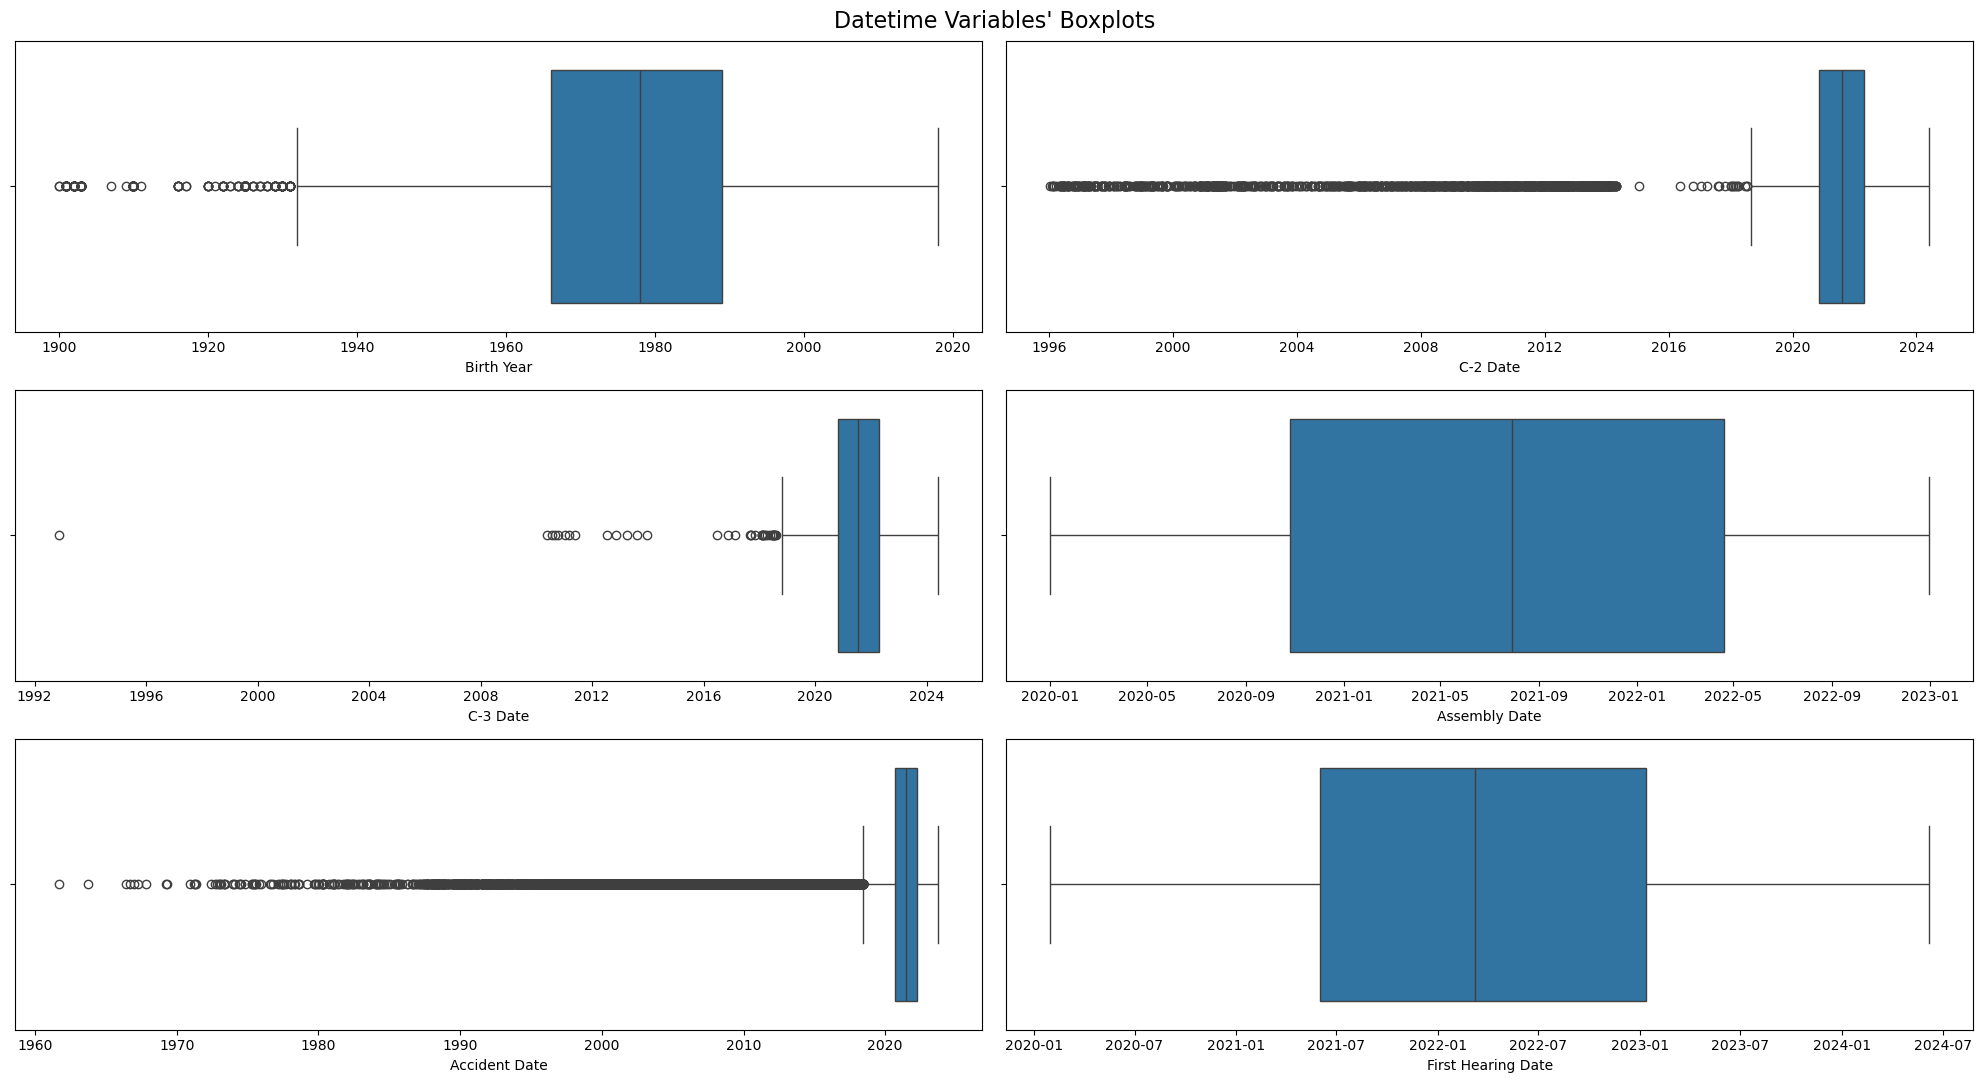

In [18]:
sp_rows = 3
sp_cols = 2

fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11), tight_layout=True)

for ax, feat in zip(axes.flatten(), features):
    sns.boxplot(x=outlier_date[feat], ax=ax)


title = "Datetime Variables' Boxplots"
plt.suptitle(title, fontsize=16)
plt.show()

#### NOTE: THE REST OF THE EDA IS IN THE NOTEBOOK MultivariateAnalysis, TO REDUCE RUNTIME

---

# 3. Data Cleaning

## 3.1 Empty rows
In the initial analysis we saw that the only features that has no missing values is `_Assembly Date_`. So let's check how many rows only have that feature filled and the rest of columns empty. Test has no rows with only `_Assembly Date_`.

In [19]:
train_data = train_data[~(train_data.drop(columns=['Assembly Date']).isna().all(axis=1) & train_data['Assembly Date'].notna())]

## 3.2 Split the train data

#### Independent and Dependent variables

Drop WCB Decision and Agreement Reached becuase they do not exist in test_data

In [20]:
X = train_data.drop(columns=['Claim Injury Type', 'WCB Decision', 'Agreement Reached'])
y = train_data['Claim Injury Type']
wcb_decision = train_data['WCB Decision']
agreement_reached = train_data['Agreement Reached']

#### Train and Validation Split

In [21]:
#Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

X_test = test_data

In [22]:
train_data_cleaned = X_train.copy()
val_data_cleaned = X_val.copy()
test_data_cleaned = X_test.copy()

## 3.3 Duplicates

Check for duplicate rows

In [23]:
print(f'Sum of duplicated rows in train_data: {train_data_cleaned.duplicated().sum()}')
print(f'Sum of duplicated rows in val_data: {val_data_cleaned.duplicated().sum()}')
print(f'Sum of duplicated rows in test_data: {test_data_cleaned.duplicated().sum()}')

Sum of duplicated rows in train_data: 1
Sum of duplicated rows in val_data: 0
Sum of duplicated rows in test_data: 2


## 3.4 Data Type Conversion
Here we are converting categorical variables that could be represented as boolean, meaning they only have two unique values, while still perserving the NaN entries present in the datasets.

In [24]:
#function to transform Y and N into boolean while preserving the NaNs
def transform_strings_in_bool(df, col_names):
    for col_name in col_names:
        df[col_name] = df[col_name].map({'Y': True, 'N': False, np.nan: np.nan})
    return df

In [25]:
train_data_cleaned = transform_strings_in_bool(train_data_cleaned, ['Alternative Dispute Resolution', 'Attorney/Representative','COVID-19 Indicator'])

val_data_cleaned = transform_strings_in_bool(val_data_cleaned, ['Alternative Dispute Resolution', 'Attorney/Representative','COVID-19 Indicator'])

test_data_cleaned = transform_strings_in_bool(test_data_cleaned, ['Alternative Dispute Resolution', 'Attorney/Representative','COVID-19 Indicator'])

Convert all date features to timestamps

In [26]:
def convert_dates_to_timestamps(df):
    # Create a copy to avoid modifying the original DataFrame
    df = df.copy()

    for col in df.columns:
        if 'Date' in col:
            # Convert the column to datetime, coerce invalid parsing to NaT
            df[col] = pd.to_datetime(df[col], errors='coerce')

        #Convert to timestamp only for valid datetime values
            df[col] = df[col].apply(lambda x: x.timestamp() if pd.notnull(x) else np.nan)

    return df

In [27]:
train_data_cleaned = convert_dates_to_timestamps(train_data_cleaned)
val_data_cleaned = convert_dates_to_timestamps(val_data_cleaned)
test_data_cleaned = convert_dates_to_timestamps(test_data_cleaned)

train_data_cleaned.describe(include='all')

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
count,4.562640e+05,459220.000000,459216,4.592200e+05,459220,4.362440e+05,435978.000000,4.475850e+05,1.496550e+05,459220,459220,459220,459220,459220,1.205410e+05,459220,106188.000000,451244.000000,451244,459220,0.0,446726.000000,446726,446711.000000,446711,445609.000000,445609,436392,459220.000000
unique,NaN,NaN,2,NaN,2,NaN,NaN,NaN,NaN,2002,8,63,2,8,NaN,4,NaN,NaN,20,5,NaN,NaN,74,NaN,56,NaN,54,9143,NaN
top,NaN,NaN,False,NaN,False,NaN,NaN,NaN,NaN,STATE INSURANCE FUND,1A. PRIVATE,SUFFOLK,False,NYC,NaN,M,NaN,NaN,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,NaN,LIFTING,NaN,STRAIN OR TEAR,NaN,LOWER BACK AREA,11236,NaN
freq,NaN,NaN,457133,NaN,313809,NaN,NaN,NaN,NaN,88790,228421,48379,437151,216838,NaN,268208,NaN,NaN,91355,212844,NaN,NaN,37240,NaN,122778,NaN,41395,2646,NaN
mean,1.619633e+09,42.109224,NaN,1.626720e+09,NaN,4.953871e+02,1886.562641,1.626459e+09,1.627336e+09,NaN,NaN,NaN,NaN,NaN,1.647671e+09,NaN,3.209525,58.651242,NaN,NaN,NaN,54.394848,NaN,41.035690,NaN,39.763059,NaN,NaN,3.005255
std,5.906275e+07,14.262865,NaN,2.721536e+07,NaN,6.777591e+03,415.100347,3.523941e+07,2.836561e+07,NaN,NaN,NaN,NaN,NaN,3.145590e+07,NaN,2.846918,19.639304,NaN,NaN,NaN,25.879721,NaN,22.208081,NaN,22.381631,NaN,NaN,2.000623
min,-2.625696e+08,0.000000,NaN,1.577837e+09,NaN,0.000000e+00,0.000000,8.214048e+08,7.216128e+08,NaN,NaN,NaN,NaN,NaN,1.580342e+09,NaN,1.000000,11.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,-9.000000,NaN,NaN,0.000000
25%,1.600042e+09,31.000000,NaN,1.603757e+09,NaN,0.000000e+00,1965.000000,1.604534e+09,1.603757e+09,NaN,NaN,NaN,NaN,NaN,1.622506e+09,NaN,1.000000,45.000000,NaN,NaN,NaN,31.000000,NaN,16.000000,NaN,33.000000,NaN,NaN,1.000000
50%,1.624752e+09,42.000000,NaN,1.627603e+09,NaN,0.000000e+00,1977.000000,1.628467e+09,1.626826e+09,NaN,NaN,NaN,NaN,NaN,1.646784e+09,NaN,2.000000,61.000000,NaN,NaN,NaN,56.000000,NaN,49.000000,NaN,38.000000,NaN,NaN,3.000000
75%,1.647907e+09,54.000000,NaN,1.650413e+09,NaN,8.433150e+02,1989.000000,1.651018e+09,1.650413e+09,NaN,NaN,NaN,NaN,NaN,1.673395e+09,NaN,4.000000,71.000000,NaN,NaN,NaN,75.000000,NaN,52.000000,NaN,53.000000,NaN,NaN,5.000000


## 3.5 Empty features

OIICS Nature of Injury Description

Between all the complains this feature is never filled, so we can drop it

In [28]:
# drop OIICS Nature of Injury Description
train_data_cleaned.drop(columns=['OIICS Nature of Injury Description'], inplace=True)
val_data_cleaned.drop(columns=['OIICS Nature of Injury Description'], inplace=True)
test_data_cleaned.drop(columns=['OIICS Nature of Injury Description'], inplace=True)

### Result Cleaning:

In [29]:
train_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459220 entries, 5785935 to 6027959
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Accident Date                      456264 non-null  float64
 1   Age at Injury                      459220 non-null  float64
 2   Alternative Dispute Resolution     459216 non-null  object 
 3   Assembly Date                      459220 non-null  float64
 4   Attorney/Representative            459220 non-null  object 
 5   Average Weekly Wage                436244 non-null  float64
 6   Birth Year                         435978 non-null  float64
 7   C-2 Date                           447585 non-null  float64
 8   C-3 Date                           149655 non-null  float64
 9   Carrier Name                       459220 non-null  object 
 10  Carrier Type                       459220 non-null  object 
 11  County of Injury                   45

In [30]:
X_train = train_data_cleaned
X_val = val_data_cleaned
X_test = test_data_cleaned

# 4. Data Pre-Processing

## 4.1 Missing Values

In [31]:
train_data_preprocessed = X_train.copy()
val_data_preprocessed = X_val.copy()
test_data_preprocessed = X_test.copy()

In [32]:
# Step 1.
# Identifying Numerical features
numerical_features = train_data_preprocessed.select_dtypes(include=['number']).columns

numerical_features = numerical_features.drop(
    [col for col in numerical_features if 'Code' in col or 'Description' in col or 'Date' in col or 'Year' in col]
)

numerical_features

Index(['Age at Injury', 'Average Weekly Wage', 'IME-4 Count',
       'Number of Dependents'],
      dtype='object')

In [33]:
train_data_preprocessed[numerical_features].isna().sum()/train_data_preprocessed.shape[0]*100

Age at Injury            0.000000
Average Weekly Wage      5.003266
IME-4 Count             76.876443
Number of Dependents     0.000000
dtype: float64

In [34]:
train_data_preprocessed[numerical_features].isna().sum()

Age at Injury                0
Average Weekly Wage      22976
IME-4 Count             353032
Number of Dependents         0
dtype: int64

#### Imputing Average Weekly Wage

In [35]:
# Step 1 Weekly Wage imputing
mean_wage_by_zip_industry = train_data_preprocessed.groupby(['Zip Code', 'Industry Code'])['Average Weekly Wage'].mean()

In [36]:
# Step 2 Weekly Wage Imputing
def impute_weekly_wage(row):
    # Check if "Average Weekly Wage" is missing
    if pd.isnull(row['Average Weekly Wage']):
        # Try to get the mean wage for the specific combination of Zip Code and Industry Code
        return mean_wage_by_zip_industry.get((row['Zip Code'], row['Industry Code']), np.nan)
    else:
        # Return the original value if not missing
        return row['Average Weekly Wage']

In [37]:
# Step 3 Apply the imputation function on X_train, X_val, and X_test
train_data_preprocessed['Average Weekly Wage'] = train_data_preprocessed.apply(impute_weekly_wage, axis=1)
val_data_preprocessed['Average Weekly Wage'] = val_data_preprocessed.apply(impute_weekly_wage, axis=1)
test_data_preprocessed['Average Weekly Wage'] = test_data_preprocessed.apply(impute_weekly_wage,axis=1)

In [38]:
# Step 4 Check sum of Na’s
train_data_preprocessed['Average Weekly Wage'].isna().sum()

2520

Still missing values in Average Weekly Wage. We will no impute them with the median.

In [39]:
train_median = train_data_preprocessed['Average Weekly Wage'].median()
train_data_preprocessed['Average Weekly Wage'].fillna(train_median, inplace=True)
val_data_preprocessed['Average Weekly Wage'].fillna(train_median, inplace=True)
test_data_preprocessed['Average Weekly Wage'].fillna(train_median, inplace=True)

C:\Users\timst\AppData\Local\Temp\ipykernel_35592\2387792268.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data_preprocessed['Average Weekly Wage'].fillna(train_median, inplace=True)
C:\Users\timst\AppData\Local\Temp\ipykernel_35592\2387792268.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [40]:
train_data_preprocessed['Average Weekly Wage'].isna().sum()

0

#### Imputing IME-4 Count

In [41]:
train_data_preprocessed["IME-4 Count"].unique()

array([ 2.,  7., nan,  6.,  3.,  4.,  5.,  1.,  8., 14., 11., 12., 10.,
       15.,  9., 13., 34., 19., 16., 24., 20., 18., 17., 27., 30., 21.,
       23., 22., 26., 25., 29., 32., 36., 28., 31., 39., 73., 33., 48.,
       47., 35., 37.])

IME-4 does not have 0 as values therefore imputin NaN with 0

In [42]:
train_data_preprocessed["IME-4 Count"].fillna(0, inplace=True)
val_data_preprocessed["IME-4 Count"].fillna(0, inplace=True)
test_data_preprocessed["IME-4 Count"].fillna(0, inplace=True)

C:\Users\timst\AppData\Local\Temp\ipykernel_35592\3829320656.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data_preprocessed["IME-4 Count"].fillna(0, inplace=True)
C:\Users\timst\AppData\Local\Temp\ipykernel_35592\3829320656.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [43]:
train_data_preprocessed["IME-4 Count"].isnull().sum()

0

#### First Hearing Date
This feature also has a high percentage of missing values. According to the provided information for this project, 'A blank date means the claim has not yet had a hearing held'. So we are creating a new binary feature if the hearing was held. 

In [44]:
train_data_preprocessed['First Hearing Date'].isnull().sum()/X.shape[0]*100

59.0006376017811

To assist in the information that this feature can provide we can create another feature called _`Has First Hearing Date`_ - a binary value that indicates if the user has had it's first hearing date

In [45]:
# create Has First Hearing Date based on if is 'N/A' or not
train_data_preprocessed['Has First Hearing Date'] = train_data_preprocessed['First Hearing Date'].apply(lambda x: 0 if x == np.nan else 1)
val_data_preprocessed['Has First Hearing Date'] = val_data_preprocessed['First Hearing Date'].apply(lambda x: 0 if x == np.nan else 1)
test_data_preprocessed['Has First Hearing Date'] = test_data_preprocessed['First Hearing Date'].apply(lambda x: 0 if x == np.nan else 1)

Now we can drop the _`First Hearing Date`_ as it has 59% of NaN values.

In [46]:
train_data_preprocessed = train_data_preprocessed.drop(columns=['First Hearing Date'])
val_data_preprocessed = val_data_preprocessed.drop(columns=['First Hearing Date'])
test_data_preprocessed = test_data_preprocessed.drop(columns=['First Hearing Date'])

#### C-2 Date

We also create binary feature _`Has C-2 Date`_ but impute the 2% with the mean of C-2

In [47]:
train_data_preprocessed['C-2 Date'].isnull().sum()/X.shape[0]*100  

2.026911672990422

In [48]:
train_data_preprocessed['Has C-2 Date'] = train_data_preprocessed['C-2 Date'].apply(lambda x: 0 if pd.isna(x) else 1)
val_data_preprocessed['Has C-2 Date'] = val_data_preprocessed['C-2 Date'].apply(lambda x: 0 if pd.isna(x) else 1)
test_data_preprocessed['Has C-2 Date'] = test_data_preprocessed['C-2 Date'].apply(lambda x: 0 if pd.isna(x) else 1)


print((train_data_preprocessed['Has C-2 Date'] == 0).sum())

mean_c2_date = train_data_preprocessed['C-2 Date'].mean()

# Fill NaN values in 'c-2' with the calculated mean date for each set
train_data_preprocessed['C-2 Date'].fillna(mean_c2_date, inplace=True)
val_data_preprocessed['C-2 Date'].fillna(mean_c2_date, inplace=True)
test_data_preprocessed['C-2 Date'].fillna(mean_c2_date, inplace=True)


11635


C:\Users\timst\AppData\Local\Temp\ipykernel_35592\1904652207.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data_preprocessed['C-2 Date'].fillna(mean_c2_date, inplace=True)
C:\Users\timst\AppData\Local\Temp\ipykernel_35592\1904652207.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [49]:
train_data_preprocessed['C-2 Date'].isnull().sum()/X.shape[0]*100  

0.0

#### Codes and Descriptions

This section will analyse data related to codes and their descriptions

In [50]:
df_codes = train_data_preprocessed[[col for col in train_data_preprocessed.columns if 'Code' in col]]
df_codes.drop(columns=['Industry Code Description', 'Zip Code'], inplace=True)

df_description = train_data_preprocessed[[col for col in train_data_preprocessed.columns if 'Description' in col]]

C:\Users\timst\AppData\Local\Temp\ipykernel_35592\3643398082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_codes.drop(columns=['Industry Code Description', 'Zip Code'], inplace=True)


In [51]:
# ensure that all codes are objects
df_codes = df_codes.astype('object')

df_codes.describe()

,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code
count,451244.0,446726.0,446711.0,445609.0
unique,24.0,77.0,56.0,57.0
top,62.0,56.0,52.0,42.0
freq,91355.0,37240.0,122778.0,41395.0


In [52]:
#check the order of the codes
df_codes.columns

Index(['Industry Code', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code'],
      dtype='object')

In [53]:
#check the order of the descriptions
df_description.columns

Index(['Industry Code Description', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Description'],
      dtype='object')

In [54]:
def code_description_consistency(df, code_column, description_column):
    # Remove rows with missing values in either the code or description columns
    df_non_null = df.dropna(subset=[code_column, description_column])

    # Check if each code maps to a unique description
    code_consistency = df_non_null.groupby(code_column)[description_column].nunique() == 1

    # Check if each description maps to a unique code
    description_consistency = df_non_null.groupby(description_column)[code_column].nunique() == 1

    # Check overall consistency
    codes_match_descriptions = code_consistency.all()
    descriptions_match_codes = description_consistency.all()

    return codes_match_descriptions, descriptions_match_codes

In [55]:
for code_col, desc_col in zip(df_codes.columns, df_description.columns):
    # Get the consistency check result
    result = code_description_consistency(train_data_preprocessed, code_col, desc_col)
    
    # Print the names of the columns along with the result
    print(f"Checking consistency between '{code_col}' and '{desc_col}': {result}")

Checking consistency between 'Industry Code' and 'Industry Code Description': (True, False)
Checking consistency between 'WCIO Cause of Injury Code' and 'WCIO Cause of Injury Description': (True, False)
Checking consistency between 'WCIO Nature of Injury Code' and 'WCIO Nature of Injury Description': (True, True)
Checking consistency between 'WCIO Part Of Body Code' and 'WCIO Part Of Body Description': (True, False)


So codes match the same description but the same does not happen for the description since we have the same description in different codes. Except for 'WCIO Nature of Injury Code' and 'WCIO Nature of Injury Description': (True, True)

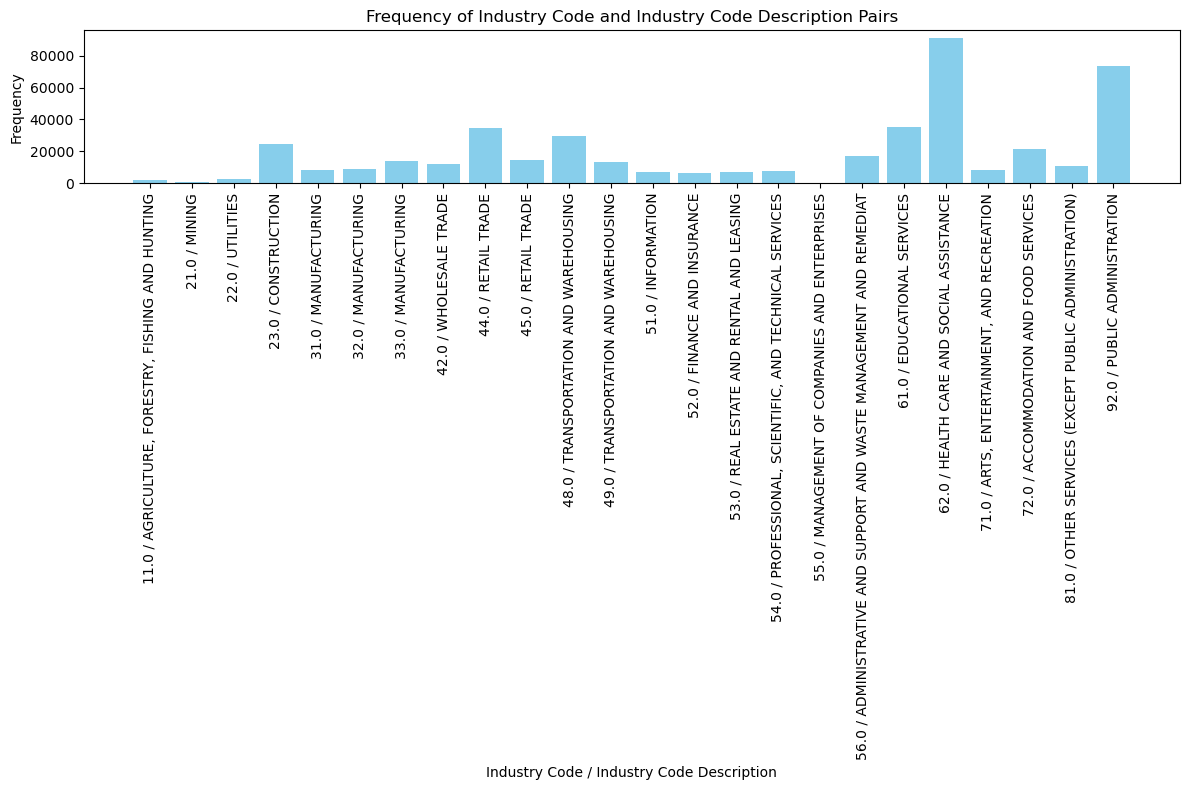

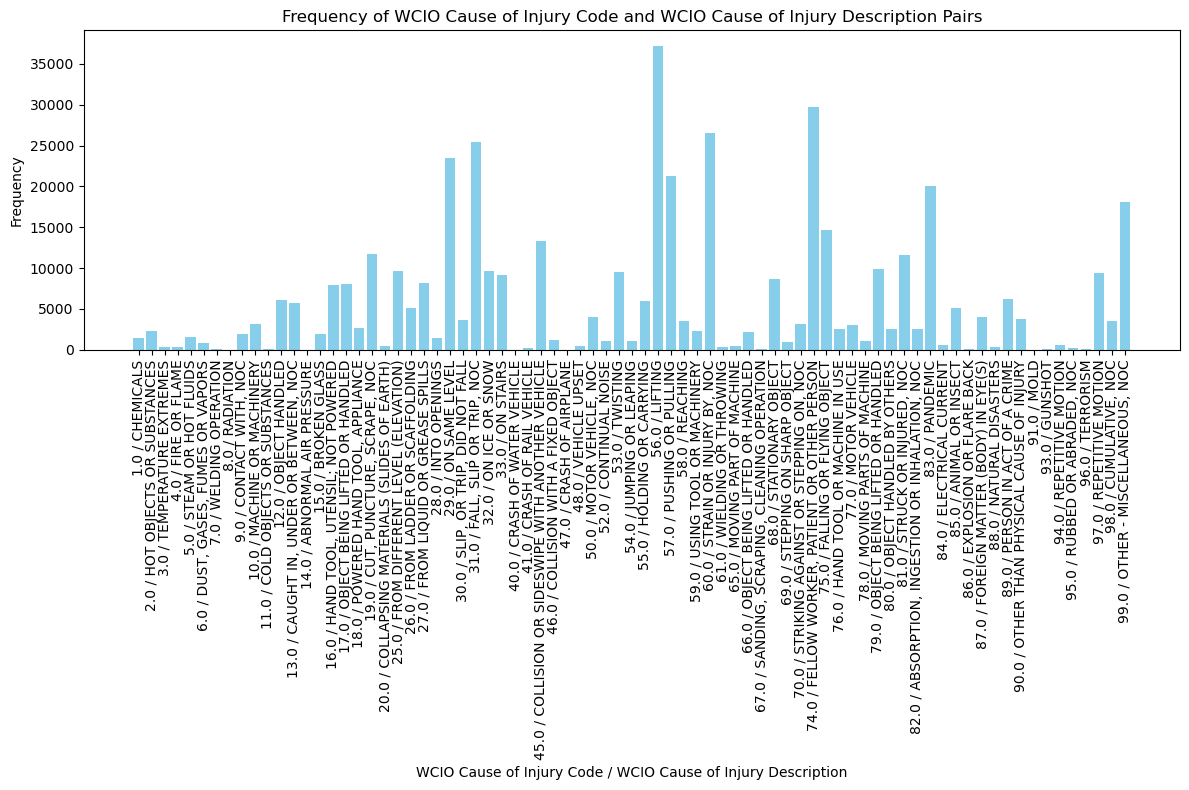

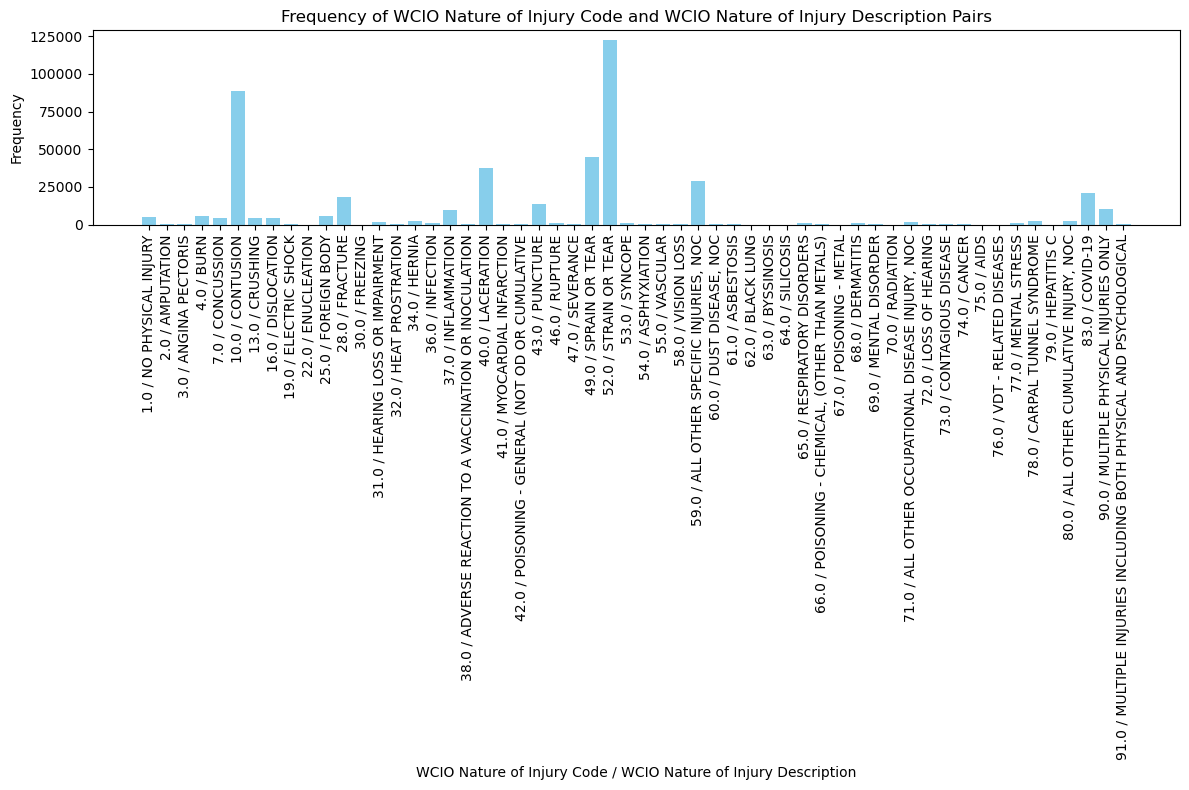

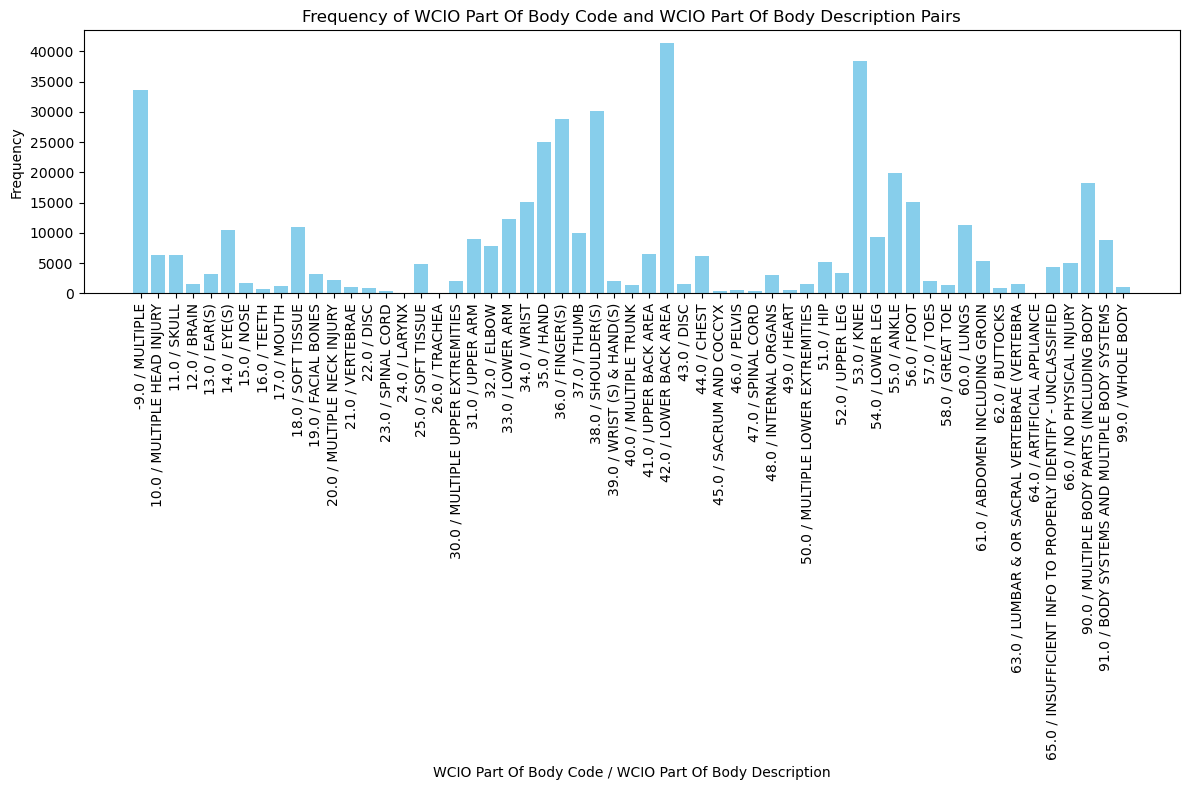

In [56]:
for code_col, desc_col in zip(df_codes.columns, df_description.columns):    
    code_column = code_col
    description_column = desc_col

    # Count occurrences of each code/description pair
    code_description_counts = train_data_preprocessed.groupby([code_column, description_column]).size().reset_index(name='Count').sort_index()

    # Plotting
    plt.figure(figsize=(12, 8))
    plt.bar(
        x=code_description_counts[code_column].astype(str) + ' / ' + code_description_counts[description_column],
        height=code_description_counts['Count'],
        color='skyblue'
    )

    # Formatting the plot
    plt.xlabel(f"{code_column} / {description_column}")
    plt.ylabel("Frequency")
    plt.title(f"Frequency of {code_column} and {description_column} Pairs")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

We can use the mode to fill the missing values

In [57]:
def compute_most_frequent_code_per_description(df, code_columns):
    # List to store results as tuples of (description, most_frequent_code) per column
    results = {}

    for code_col in code_columns:
        description_col = code_col.replace('code', 'description')
        
        # Calculate most frequent code for each unique description
        most_frequent_code_series = (
            df.groupby(description_col)[code_col]
            .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
        )
        
        # Convert to numpy array
        results[code_col] = np.array(
            list(zip(most_frequent_code_series.index, most_frequent_code_series.values)),
            dtype=[('description', 'O'), ('most_frequent_code', 'O')]
        )

    return results

In [58]:
def fill_missing_codes(df, code_columns, most_frequent_code_arrays):
    for code_col in code_columns:
        description_col = code_col.replace('code', 'description')
        
        # Extract the numpy array for the current code column
        most_frequent_array = most_frequent_code_arrays[code_col]

        # Map description values to their most frequent codes using numpy indexing
        description_to_code = {desc: code for desc, code in most_frequent_array}

        # Fill missing values in the DataFrame using numpy structure
        df[code_col] = df.apply(
            lambda row: (
                description_to_code.get(row[description_col], row[code_col])
                if pd.isna(row[code_col]) and not pd.isna(row[description_col]) else row[code_col]
            ),
            axis=1
        )

    df = df.infer_objects(copy=False)
    return df

In [59]:
codes_columns = df_codes.columns.tolist()

# fill missing values in df_codes
train_data_preprocessed = fill_missing_codes(train_data_preprocessed, codes_columns, compute_most_frequent_code_per_description(train_data_preprocessed, codes_columns))

# fill missing values for validation data
val_data_preprocessed = fill_missing_codes(val_data_preprocessed, codes_columns, compute_most_frequent_code_per_description(val_data_preprocessed, codes_columns))


# fill missing values for test data
test_data_preprocessed = fill_missing_codes(test_data_preprocessed, codes_columns, compute_most_frequent_code_per_description(test_data_preprocessed, codes_columns))


In [60]:
train_data_preprocessed[codes_columns].isna().sum()/train_data_preprocessed.shape[0]*100

Industry Code                 1.736858
WCIO Cause of Injury Code     2.720700
WCIO Nature of Injury Code    2.723967
WCIO Part Of Body Code        2.963939
dtype: float64

Fill remaining with most frequent mode per description

In [61]:
def fill_missing_with_mode(df, columns):
    # Find the most frequent code
    for column in columns:
        most_frequent_code = df[column].mode().iloc[0]  # Get the mode (most frequent value)
        
        # Use .loc to avoid SettingWithCopyWarning and fill NaNs
        df.loc[:, column] = df[column].fillna(most_frequent_code)
    
    # Use .infer_objects to avoid FutureWarning if dtype downcasting is a concern
    df = df.infer_objects(copy=False)
    
    return df

In [62]:
description_columns = df_description.columns.tolist()

# fill missing values in df_codes 
train_data_preprocessed = fill_missing_with_mode(train_data_preprocessed, codes_columns)
val_data_preprocessed = fill_missing_with_mode(val_data_preprocessed, codes_columns)
test_data_preprocessed = fill_missing_with_mode(test_data_preprocessed, codes_columns)

In [63]:
train_data_preprocessed[codes_columns].isna().sum()/train_data_preprocessed.shape[0]*100

Industry Code                 0.0
WCIO Cause of Injury Code     0.0
WCIO Nature of Injury Code    0.0
WCIO Part Of Body Code        0.0
dtype: float64

Now we drop all Description Columns as they hold no additional informational value compared to the codes.

In [64]:
train_data_preprocessed = train_data_preprocessed.drop(columns=['WCIO Cause of Injury Description', 'WCIO Nature of Injury Description','WCIO Part Of Body Description','Industry Code Description'])
val_data_preprocessed = val_data_preprocessed.drop(columns=['WCIO Cause of Injury Description', 'WCIO Nature of Injury Description','WCIO Part Of Body Description','Industry Code Description'])
test_data_preprocessed = test_data_preprocessed.drop(columns=['WCIO Cause of Injury Description', 'WCIO Nature of Injury Description','WCIO Part Of Body Description','Industry Code Description'])

In [65]:
test_data_preprocessed.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Number of Dependents,Has First Hearing Date,Has C-2 Date
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,
6165911,1.671840e+09,19,False,1.672618e+09,False,727.402650,2003.0,1.672618e+09,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,BRONX,False,NYC,M,0.0,48.0,IV,31.0,10.0,54.0,10466,1,1,1
6166141,1.668902e+09,19,False,1.672618e+09,False,205.659259,2003.0,1.672618e+09,NaN,A I U INSURANCE COMPANY,1A. PRIVATE,QUEENS,False,NYC,F,0.0,45.0,IV,75.0,10.0,10.0,11691,1,1,1
6165907,1.672013e+09,59,False,1.672618e+09,False,0.000000,1963.0,1.672445e+09,NaN,AMGUARD INSURANCE COMPANY,1A. PRIVATE,WESTCHESTER,False,NYC,F,0.0,56.0,III,68.0,49.0,62.0,10604,0,1,1
6166047,1.672186e+09,55,False,1.672618e+09,False,0.000000,0.0,1.672618e+09,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,QUEENS,False,NYC,F,0.0,48.0,IV,25.0,10.0,53.0,11411,6,1,1
6166102,1.671494e+09,25,False,1.672618e+09,False,0.000000,1997.0,1.672445e+09,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,KINGS,False,NYC,M,0.0,55.0,IV,79.0,40.0,37.0,11212,5,1,1


#### Zip code

In [66]:
train_data_preprocessed['Zip Code'].isnull().sum()/train_data_preprocessed.shape[0]*100

4.971037846783677

We replace the missing value for zip code with the mode using first the county of injury and the disctrict name if there is no match it uses the mode of the zip code for the district name only
- we use only the mode from train data to avoid data leackage

In [67]:
# Save the original index
original_index_train = train_data_preprocessed.index
original_index_val = val_data_preprocessed.index
original_index_test = test_data_preprocessed.index

# Calculate mode Zip Codes for each group
mode_zip_codes_train = train_data_preprocessed.groupby(['County of Injury', 'District Name'])['Zip Code'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()
mode_zip_district_train = train_data_preprocessed.groupby('District Name')['Zip Code'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()
mode_zip_district_train.columns = ['District Name', 'Zip Code_mode_district']

# Apply the mode filling strategy on each dataset
for i, dataset in enumerate([test_data_preprocessed, val_data_preprocessed, train_data_preprocessed]):
    # Merge with mode_zip_codes based on County of Injury and District Name
    dataset = dataset.merge(
        mode_zip_codes_train,
        on=['County of Injury', 'District Name'],
        how='left',
        suffixes=('', '_mode')
    )

    # Fill missing Zip Code values with the mode values from train_data_preprocessed
    dataset['Zip Code'] = dataset['Zip Code'].combine_first(dataset['Zip Code_mode'])

    # Merge with mode_zip_district for District Name fallback
    dataset = dataset.merge(
        mode_zip_district_train,
        on='District Name',
        how='left'
    )

    # Fill remaining missing Zip Code values with District Name mode
    dataset['Zip Code'] = dataset['Zip Code'].combine_first(dataset['Zip Code_mode_district'])

    # Drop the added columns
    dataset.drop(columns=['Zip Code_mode', 'Zip Code_mode_district'], inplace=True)

    # Assign back the modified DataFrame to the correct variable
    if i == 0:
        test_data_preprocessed = dataset
    elif i == 1:
        val_data_preprocessed = dataset
    else:
        train_data_preprocessed = dataset

# Ensure the index is preserved
train_data_preprocessed.index = original_index_train
val_data_preprocessed.index = original_index_val
test_data_preprocessed.index = original_index_test


print("Missing Zip Code values in test_data_preprocessed:", test_data_preprocessed['Zip Code'].isnull().sum())
print("Missing Zip Code values in val_data_preprocessed:", val_data_preprocessed['Zip Code'].isnull().sum())
print("Missing Zip Code values in train_data_preprocessed:", train_data_preprocessed['Zip Code'].isnull().sum())

C:\Users\timst\AppData\Local\Temp\ipykernel_35592\2037980840.py:7: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'float'
  mode_zip_codes_train = train_data_preprocessed.groupby(['County of Injury', 'District Name'])['Zip Code'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()
C:\Users\timst\AppData\Local\Temp\ipykernel_35592\2037980840.py:7: UserWarning: Unable to sort modes: '<' not supported between instances of 'float' and 'str'
  mode_zip_codes_train = train_data_preprocessed.groupby(['County of Injury', 'District Name'])['Zip Code'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()


Missing Zip Code values in test_data_preprocessed: 0
Missing Zip Code values in val_data_preprocessed: 0
Missing Zip Code values in train_data_preprocessed: 0


In [68]:
test_data_preprocessed.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Number of Dependents,Has First Hearing Date,Has C-2 Date
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,
6165911,1.671840e+09,19,False,1.672618e+09,False,727.402650,2003.0,1.672618e+09,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,BRONX,False,NYC,M,0.0,48.0,IV,31.0,10.0,54.0,10466,1,1,1
6166141,1.668902e+09,19,False,1.672618e+09,False,205.659259,2003.0,1.672618e+09,NaN,A I U INSURANCE COMPANY,1A. PRIVATE,QUEENS,False,NYC,F,0.0,45.0,IV,75.0,10.0,10.0,11691,1,1,1
6165907,1.672013e+09,59,False,1.672618e+09,False,0.000000,1963.0,1.672445e+09,NaN,AMGUARD INSURANCE COMPANY,1A. PRIVATE,WESTCHESTER,False,NYC,F,0.0,56.0,III,68.0,49.0,62.0,10604,0,1,1
6166047,1.672186e+09,55,False,1.672618e+09,False,0.000000,0.0,1.672618e+09,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,QUEENS,False,NYC,F,0.0,48.0,IV,25.0,10.0,53.0,11411,6,1,1
6166102,1.671494e+09,25,False,1.672618e+09,False,0.000000,1997.0,1.672445e+09,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,KINGS,False,NYC,M,0.0,55.0,IV,79.0,40.0,37.0,11212,5,1,1


#### Accident Date

Impute the missing Accidsent Dates with the mean difference to C-2 Date

In [69]:
train_data_preprocessed['Accident Date'].isnull().sum()/train_data_preprocessed.shape[0]*100

0.6437001872740734

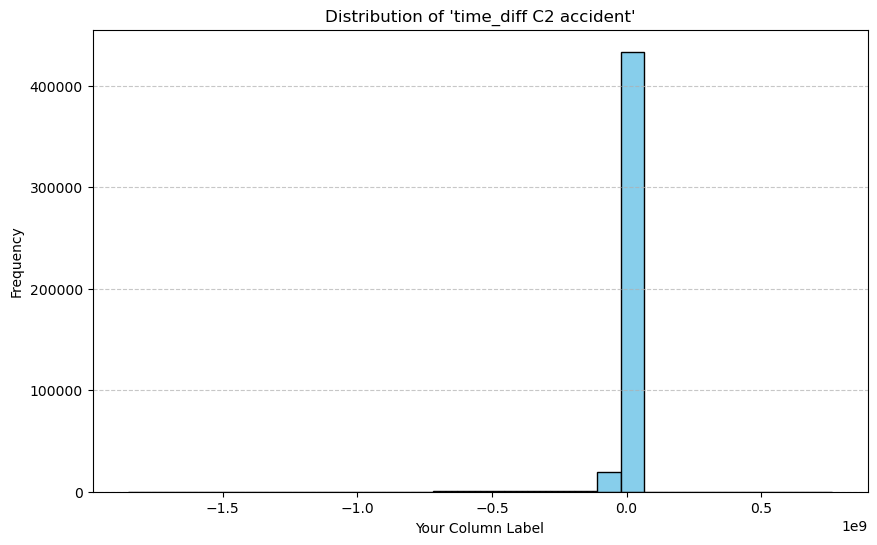

In [70]:
train_data_preprocessed['time_diff C2 accident'] = train_data_preprocessed['Accident Date']-train_data_preprocessed['C-2 Date']
plt.figure(figsize=(10, 6))
plt.hist(train_data_preprocessed['time_diff C2 accident'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of 'time_diff C2 accident'")
plt.xlabel("Your Column Label")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [71]:
# check for bitrh year and c-date assembly date 
mean_difference_c2_accident = train_data_preprocessed['time_diff C2 accident'].mean()


# Fill NaN values in 'accident_date' with the calculated mean date for each set
train_data_preprocessed['Accident Date'].fillna(train_data_preprocessed['C-2 Date'] - mean_difference_c2_accident, inplace=True)
val_data_preprocessed['Accident Date'].fillna(val_data_preprocessed['C-2 Date'] - mean_difference_c2_accident, inplace=True)
test_data_preprocessed['Accident Date'].fillna(test_data_preprocessed['C-2 Date'] - mean_difference_c2_accident, inplace=True)

C:\Users\timst\AppData\Local\Temp\ipykernel_35592\3712374120.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data_preprocessed['Accident Date'].fillna(train_data_preprocessed['C-2 Date'] - mean_difference_c2_accident, inplace=True)
C:\Users\timst\AppData\Local\Temp\ipykernel_35592\3712374120.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inter

In [72]:
train_data_preprocessed['Accident Date'].isnull().sum()/train_data_preprocessed.shape[0]*100

0.0

In [73]:
train_data_preprocessed = train_data_preprocessed.drop(columns=['time_diff C2 accident'])

### C-3 Date

Create binary value for C-3 Date again as it has 67% missing values. Afterwards drop the feature.

In [74]:
train_data_preprocessed['C-3 Date'].isnull().sum()/train_data_preprocessed.shape[0]*100

67.41104481512129

In [75]:
train_data_preprocessed['Has C-3 Date'] = train_data_preprocessed['C-3 Date'].apply(lambda x: 0 if pd.isna(x) else 1)
val_data_preprocessed['Has C-3 Date'] = val_data_preprocessed['C-3 Date'].apply(lambda x: 0 if pd.isna(x)  else 1)
test_data_preprocessed['Has C-3 Date'] = test_data_preprocessed['C-3 Date'].apply(lambda x: 0 if pd.isna(x) else 1)

In [76]:
train_data_preprocessed.head().T

Claim Identifier,5785935,6090033,6136197,6019545,5792247
Accident Date,1628121600.0,1663113600.0,1667779200.0,1599004800.0,1628812800.0
Age at Injury,49.0,56.0,48.0,55.0,53.0
Alternative Dispute Resolution,False,False,False,False,False
Assembly Date,1628553600.0,1663718400.0,1668729600.0,1655769600.0,1629244800.0
Attorney/Representative,True,True,False,False,True
Average Weekly Wage,744.06,845.29,0.0,0.0,668.08
Birth Year,1971.0,1966.0,1974.0,0.0,1968.0
C-2 Date,1628553600.0,1663718400.0,1668729600.0,1655769600.0,1629244800.0
C-3 Date,1630281600.0,1664236800.0,NaN,1647388800.0,1638230400.0
Carrier Name,PROPERTY AND CASUALTY,EVEREST PREMIER INSURANCE,CHARTER OAK FIRE INS CO,NEW HAMPSHIRE INSURANCE CO,STATE INSURANCE FUND


In [77]:
train_data_preprocessed = train_data_preprocessed.drop(columns=['C-3 Date'])
val_data_preprocessed = val_data_preprocessed.drop(columns=['C-3 Date'])
test_data_preprocessed = test_data_preprocessed.drop(columns=['C-3 Date'])

#### Birth Year

Impute with the difference of Age at Injury and Accident Date Year

In [78]:
train_data_preprocessed['Birth Year'].isnull().sum()/train_data_preprocessed.shape[0]*100

5.0611907146901265

In [79]:
def process_birth_year_columns(df):

    accident_col = df['Accident Date'].copy()
    # Replace 0.0 values with NaN in 'Birth Year'
    df['Birth Year'] = df['Birth Year'].replace(0.0, np.nan)

    # Ensure 'Accident Date' is in datetime format
    accident_col = pd.to_datetime(accident_col, errors='coerce')

    # Fill NaN values with calculated birth years in seconds
    if df['Birth Year'].isna().any():
        # Calculate the birth year by subtracting 'Age at Injury' (converted to years * 365.25 days) from 'Accident Date'
        calculated_birth_years = accident_col - pd.to_timedelta(df['Age at Injury'] * 365.25, unit='D')

        # Extract the year from the resulting date
        df['Birth Year'].fillna(calculated_birth_years.dt.year, inplace=True)

    # Ensure 'Birth Year' is numeric (in case it was converted to datetime)
    df['Birth Year'] = pd.to_numeric(df['Birth Year'], errors='coerce')

    # Convert the 'Birth Year' to datetime using the first day of the year (01-01)
    df['Birth Year'] = pd.to_datetime(df['Birth Year'], format='%Y', errors='coerce')

    # Convert to Unix timestamp using timestamp() method
    df['Birth Year'] = df['Birth Year'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)

    return df

In [80]:
train_data_preprocessed = process_birth_year_columns(train_data_preprocessed)
val_data_preprocessed = process_birth_year_columns(val_data_preprocessed)
test_data_preprocessed = process_birth_year_columns(test_data_preprocessed)

C:\Users\timst\AppData\Local\Temp\ipykernel_35592\2060581475.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Birth Year'].fillna(calculated_birth_years.dt.year, inplace=True)
C:\Users\timst\AppData\Local\Temp\ipykernel_35592\2060581475.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [81]:
train_data_preprocessed['Birth Year'].isnull().sum()/train_data_preprocessed.shape[0]*100

0.0

Rest of missing values are imputed by the median

In [82]:
train_median_by = train_data_preprocessed['Birth Year'].median()

train_data_preprocessed['Birth Year'].fillna(train_median_by, inplace=True)
val_data_preprocessed['Birth Year'].fillna(train_median_by, inplace=True)
test_data_preprocessed['Birth Year'].fillna(train_median_by, inplace=True)

C:\Users\timst\AppData\Local\Temp\ipykernel_35592\2025482474.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data_preprocessed['Birth Year'].fillna(train_median_by, inplace=True)
C:\Users\timst\AppData\Local\Temp\ipykernel_35592\2025482474.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [83]:
train_data_preprocessed['Birth Year'].isnull().sum()/train_data_preprocessed.shape[0]*100

0.0

#### Alternative Dispute Resolution

Fill with mode because the percentage of missing values is only 0.0008%

In [84]:
train_data_preprocessed['Alternative Dispute Resolution'].isnull().sum()/train_data_preprocessed.shape[0]*100

0.0008710422019946866

In [85]:
# Calculate the mode (most frequent value) from train_data
mode_value = train_data_preprocessed['Alternative Dispute Resolution'].mode()[0]
print(f"Mode of 'Alternative Dispute Resolution': {mode_value}")

# Impute missing values in 'Alternative Dispute Resolution' with the mode
train_data_preprocessed['Alternative Dispute Resolution'].fillna(mode_value, inplace=True)
val_data_preprocessed['Alternative Dispute Resolution'].fillna(mode_value, inplace=True)
test_data_preprocessed['Alternative Dispute Resolution'].fillna(mode_value, inplace=True)


C:\Users\timst\AppData\Local\Temp\ipykernel_35592\2330248174.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data_preprocessed['Alternative Dispute Resolution'].fillna(mode_value, inplace=True)
C:\Users\timst\AppData\Local\Temp\ipykernel_35592\2330248174.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True

Mode of 'Alternative Dispute Resolution': False


In [86]:
train_data_preprocessed['Alternative Dispute Resolution'].isnull().sum()/train_data_preprocessed.shape[0]*100

0.0

### Result Missing values:

In [87]:
print(f'Sum of missing values in train_data_preprocessed: {train_data_preprocessed.isnull().sum().sum()}')
print(f'Sum of missing values in val_data_preprocessed: {val_data_preprocessed.isnull().sum().sum()}')
print(f'Sum of missing values in test_data_preprocessed: {test_data_preprocessed.isnull().sum().sum()}')

Sum of missing values in train_data_preprocessed: 0
Sum of missing values in val_data_preprocessed: 0
Sum of missing values in test_data_preprocessed: 0


In [88]:
X_train = train_data_preprocessed
X_val = val_data_preprocessed
X_test = test_data_preprocessed

## 4.2 Outliers

#### Checking outliers 

In [89]:
outliers_train = X_train.copy()
outliers_val = X_val.copy()
outliers_test = X_test.copy()

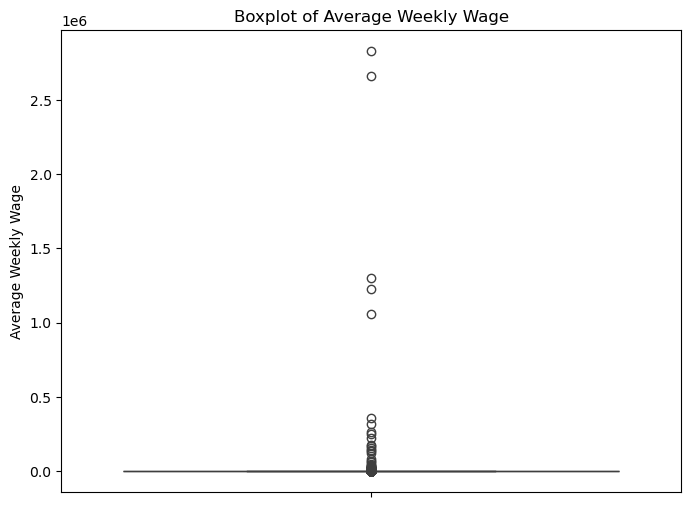

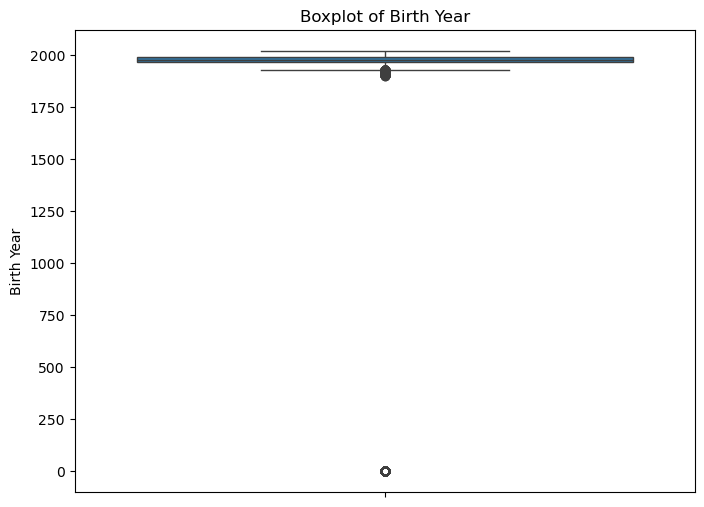

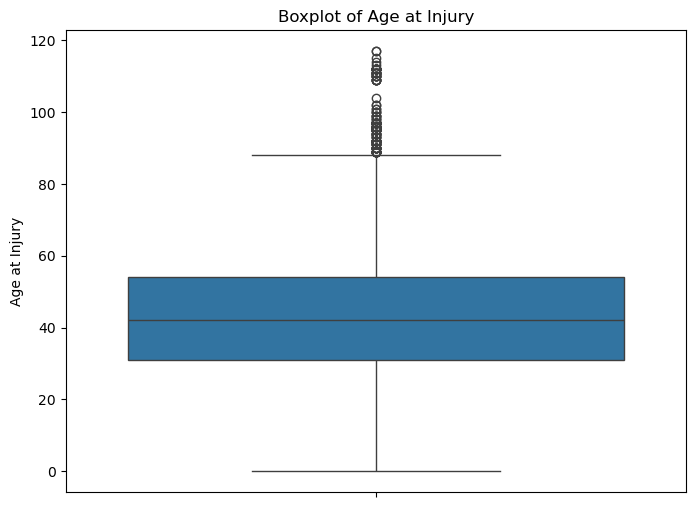

In [90]:
# Filtering out only numerical columns for boxplots
numerical_columns = outliers_train[['Average Weekly Wage', 'Birth Year', 'Age at Injury']]

# Create a boxplot for each numerical column in the list
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=train_data, y=column)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

### Treating Outliers

#### Treating Age Outliers

From domain knowledge implying a lower_bound for working at 14 and the upper_bound by the calculation of Q3 + 1.5 * IQR

In [91]:
# Calculate the IQR for 'Age at Injury'
Q1 = outliers_train['Age at Injury'].quantile(0.25)
Q3 = outliers_train['Age at Injury'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = int(Q3 + 1.5 * IQR)

# Count the number of values that would be capped in each dataset
train_lower_changes = (outliers_train['Age at Injury'] < 14).sum()
train_upper_changes = (outliers_train['Age at Injury'] > upper_bound).sum()

val_lower_changes = (outliers_val['Age at Injury'] < 14).sum()
val_upper_changes = (outliers_val['Age at Injury'] > upper_bound).sum()

test_lower_changes = (outliers_test['Age at Injury'] < 14).sum()
test_upper_changes = (outliers_test['Age at Injury'] > upper_bound).sum()

# Set lower limit to 14 and apply the calculated upper limit
outliers_train['Age at Injury'] = outliers_train['Age at Injury'].clip(lower=14, upper=upper_bound)
outliers_val['Age at Injury'] = outliers_val['Age at Injury'].clip(lower=14, upper=upper_bound)
outliers_test['Age at Injury'] = outliers_test['Age at Injury'].clip(lower=14, upper=upper_bound)

# Print the number of changes
print(f"Number of lower bound changes in train: {train_lower_changes}")
print(f"Number of upper bound changes in train: {train_upper_changes}")
print(f"Total changes in train: {train_lower_changes + train_upper_changes}")

print(f"Number of lower bound changes in val: {val_lower_changes}")
print(f"Number of upper bound changes in val: {val_upper_changes}")
print(f"Total changes in val: {val_lower_changes + val_upper_changes}")

print(f"Number of lower bound changes in test: {test_lower_changes}")
print(f"Number of upper bound changes in test: {test_upper_changes}")
print(f"Total changes in test: {test_lower_changes + test_upper_changes}")

Number of lower bound changes in train: 4400
Number of upper bound changes in train: 161
Total changes in train: 4561
Number of lower bound changes in val: 1111
Number of upper bound changes in val: 36
Total changes in val: 1147
Number of lower bound changes in test: 3283
Number of upper bound changes in test: 443
Total changes in test: 3726


In [92]:
outliers_train['Age at Injury'].max()

88.0

### Treating Birth Year Outliers

Implying same logic to Birth Year using max Age at Injury for lower bound

In [93]:
# Calculate the IQR for 'Birth Year' in the training dataset
Q1 = outliers_train['Birth Year'].quantile(0.25)
Q3 = outliers_train['Birth Year'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = max(int(Q1 - 1.5 * IQR), 1934)
upper_bound = 2006  # Clipping upper bound to 2006

# Track changes for each dataset before clipping
train_birth_year_original = outliers_train['Birth Year'].copy()
val_birth_year_original = outliers_val['Birth Year'].copy()
test_birth_year_original = outliers_test['Birth Year'].copy()

# Apply clipping for 'Birth Year' based on the calculated bounds
outliers_train['Birth Year'] = outliers_train['Birth Year'].clip(lower=lower_bound, upper=upper_bound)
outliers_val['Birth Year'] = outliers_val['Birth Year'].clip(lower=lower_bound, upper=upper_bound)
outliers_test['Birth Year'] = outliers_test['Birth Year'].clip(lower=lower_bound, upper=upper_bound)

# Count the number of values that were clipped in each dataset
train_lower_changes = (train_birth_year_original < lower_bound).sum()
train_upper_changes = (train_birth_year_original > upper_bound).sum()
val_lower_changes = (val_birth_year_original < lower_bound).sum()
val_upper_changes = (val_birth_year_original > upper_bound).sum()
test_lower_changes = (test_birth_year_original < lower_bound).sum()
test_upper_changes = (test_birth_year_original > upper_bound).sum()

# Print the counts of changes
print(f"Number of lower bound changes in train: {train_lower_changes}")
print(f"Number of upper bound changes in train: {train_upper_changes}")
print(f"Total changes in train: {train_lower_changes + train_upper_changes}")

print(f"Number of lower bound changes in val: {val_lower_changes}")
print(f"Number of upper bound changes in val: {val_upper_changes}")
print(f"Total changes in val: {val_lower_changes + val_upper_changes}")

print(f"Number of lower bound changes in test: {test_lower_changes}")
print(f"Number of upper bound changes in test: {test_upper_changes}")
print(f"Total changes in test: {test_lower_changes + test_upper_changes}")

Number of lower bound changes in train: 186629
Number of upper bound changes in train: 272591
Total changes in train: 459220
Number of lower bound changes in val: 46559
Number of upper bound changes in val: 68247
Total changes in val: 114806
Number of lower bound changes in test: 135828
Number of upper bound changes in test: 252147
Total changes in test: 387975


In [94]:
outliers_train['Birth Year'].min()

1934.0

### Treating Wage Outliers

Log transformation on the wages as the distribution is heavily right skewed

In [95]:
# Apply log transformation for skewed wage values
outliers_train['Average Weekly Wage'] = outliers_train['Average Weekly Wage'].apply(lambda x: np.log1p(x) if x > 0 else 0)
outliers_val['Average Weekly Wage'] = outliers_val['Average Weekly Wage'].apply(lambda x: np.log1p(x) if x > 0 else 0)
outliers_test['Average Weekly Wage'] = outliers_test['Average Weekly Wage'].apply(lambda x: np.log1p(x) if x > 0 else 0)

# Count the number of values changed by log transformation
train_log_changes = (outliers_train['Average Weekly Wage'] != X_train['Average Weekly Wage']).sum()
val_log_changes = (outliers_val['Average Weekly Wage'] != X_val['Average Weekly Wage']).sum()
test_log_changes = (outliers_test['Average Weekly Wage'] != X_test['Average Weekly Wage']).sum()


print(f"Number of changes due to log transformation in train: {train_log_changes}")
print(f"Number of changes due to log transformation in val: {val_log_changes}")
print(f"Number of changes due to log transformation in test: {test_log_changes}")


Number of changes due to log transformation in train: 187611
Number of changes due to log transformation in val: 46568
Number of changes due to log transformation in test: 68796


### Outlier plots after treatment

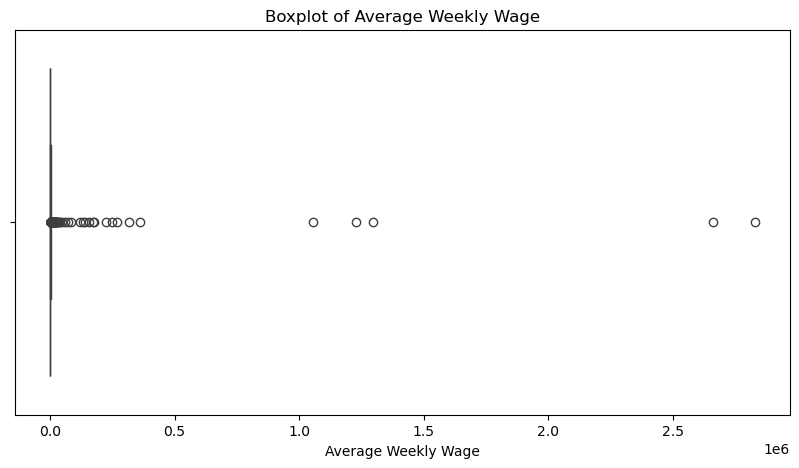

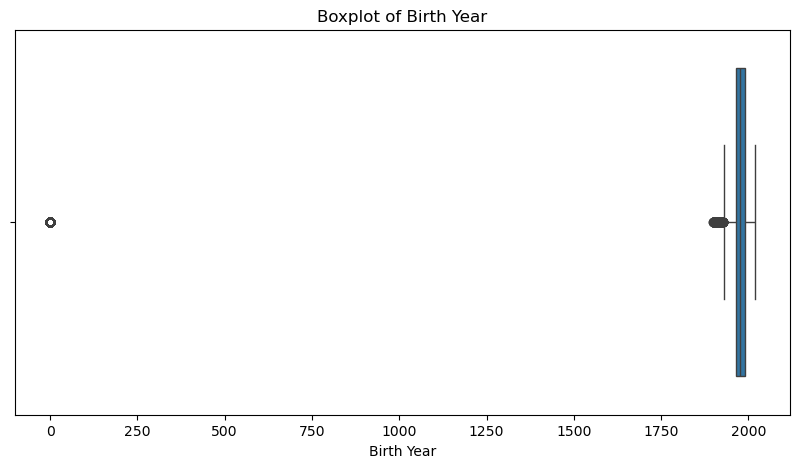

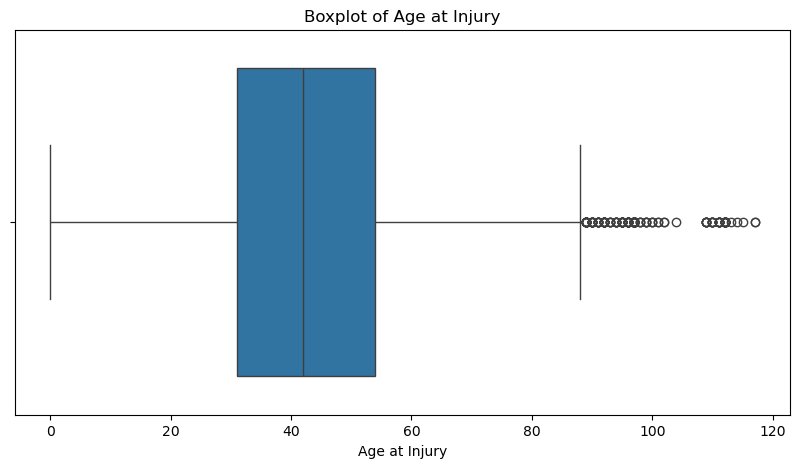

In [96]:
# Create a horizontal boxplot for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=train_data, x=column)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

In [97]:
X_train = outliers_train
X_val = outliers_val
X_test = outliers_test

## 4.3 Data Scaling

### Scaling Numerical Values

We scale these ['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents'] features using MinMaxScaler because thez have defined boundaries that they should not exceed.

In [98]:
numerical_scaling_train = X_train[['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents']].copy()
numerical_scaling_val = X_val[['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents']].copy()
numerical_scaling_test = X_test[['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents']].copy()

In [99]:
#call function
scaler = MinMaxScaler()

#fit to training data
scaler.fit(numerical_scaling_train)

#transform the data
X_train_num_scaled = scaler.transform(numerical_scaling_train) # this will return an array
X_val_num_scaled = scaler.transform(numerical_scaling_val) # this will return an array
X_test_num_scaled = scaler.transform(numerical_scaling_test) # this will return an array


#show results
X_train_num_scaled

array([[0.47297297, 1.        , 0.02739726, 1.        ],
       [0.56756757, 0.        , 0.09589041, 0.83333333],
       [0.45945946, 1.        , 0.        , 0.33333333],
       ...,
       [0.58108108, 0.        , 0.        , 0.83333333],
       [0.        , 1.        , 0.        , 0.66666667],
       [0.16216216, 1.        , 0.        , 0.33333333]])

In [100]:
numerical_scaling_train = pd.DataFrame(X_train_num_scaled, columns = numerical_scaling_train.columns).set_index(X_train.index)
numerical_scaling_val = pd.DataFrame(X_val_num_scaled, columns = numerical_scaling_val.columns).set_index(X_val.index)
numerical_scaling_test = pd.DataFrame(X_test_num_scaled, columns = numerical_scaling_test.columns).set_index(X_test.index)

In [101]:
X_train[['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents']] = numerical_scaling_train
X_val[['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents']] = numerical_scaling_val
X_test[['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents']] = numerical_scaling_test

In [102]:
X_train.head().T

Claim Identifier,5785935,6090033,6136197,6019545,5792247
Accident Date,1628121600.0,1663113600.0,1667779200.0,1599004800.0,1628812800.0
Age at Injury,0.472973,0.567568,0.459459,0.554054,0.527027
Alternative Dispute Resolution,False,False,False,False,False
Assembly Date,1628553600.0,1663718400.0,1668729600.0,1655769600.0,1629244800.0
Attorney/Representative,True,True,False,False,True
Average Weekly Wage,6.613465,6.740862,0.0,0.0,6.505904
Birth Year,1.0,0.0,1.0,0.0,0.0
C-2 Date,1628553600.0,1663718400.0,1668729600.0,1655769600.0,1629244800.0
Carrier Name,PROPERTY AND CASUALTY,EVEREST PREMIER INSURANCE,CHARTER OAK FIRE INS CO,NEW HAMPSHIRE INSURANCE CO,STATE INSURANCE FUND
Carrier Type,1A. PRIVATE,1A. PRIVATE,1A. PRIVATE,1A. PRIVATE,2A. SIF


### Scaling Timestamps

Scaling the timestamps with StandardScaler as the magnitude of values keeps preserved. Better for Logistic Regression and SVM.

In [103]:
date_cols = X_train.columns[X_train.columns.str.contains('Date')].drop(['Has First Hearing Date', 'Has C-2 Date', 'Has C-3 Date'])

In [104]:
X_train_time_scaling = X_train[date_cols].copy()
X_val_time_scaling = X_val[date_cols].copy()
X_test_time_scaling = X_test[date_cols].copy()

In [105]:
scaler = StandardScaler()
scaler.fit(X_train_time_scaling)

StandardScaler()

In [106]:
X_train_scaled = scaler.transform(X_train_time_scaling)
X_val_scaled = scaler.transform(X_val_time_scaling)
X_test_scaled = scaler.transform(X_test_time_scaling)

In [107]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_time_scaling.columns).set_index(X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val_time_scaling.columns).set_index(X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_time_scaling.columns).set_index(X_test.index)

In [108]:
X_train[X_train_time_scaling.columns] = X_train_scaled
X_val[X_val_time_scaling.columns] = X_val_scaled
X_test[X_test_time_scaling.columns] = X_test_scaled

In [109]:
X_train_scaled.head()

,Accident Date,Assembly Date,C-2 Date
Claim Identifier,,,
5785935,0.142472,0.067364,0.060200
6090033,0.736298,1.359460,1.070971
6136197,0.815474,1.543591,1.215012
6019545,-0.351650,1.067389,0.842492
5792247,0.154202,0.092762,0.080068


## 4.4 Encoding

In [110]:
X_train_encoded = X_train.copy()
X_val_encoded = X_val.copy()
X_test_encoded = X_test.copy()

y_train_encoded = y_train.copy()
y_val_encoded = y_val.copy()

Change all 'Code' Columns to objects because they are categorical data

In [111]:
# Print data types before the change
print("Data types before change:")
categorical = X_train_encoded.select_dtypes(include=['object']).columns.tolist()
print(categorical)

# Identify columns that end with "Code"
code_columns = [col for col in X_train_encoded.columns if col.endswith("Code")]

# Convert these columns to strings without altering values
X_train_encoded[code_columns] = X_train_encoded[code_columns].astype(str)
X_val_encoded[code_columns] = X_val_encoded[code_columns].astype(str)
X_test_encoded[code_columns] = X_test_encoded[code_columns].astype(str)

# Print data types after the change
print("\nData types after change:")
print(X_train_encoded.dtypes)

Data types before change:
['Carrier Name', 'Carrier Type', 'County of Injury', 'District Name', 'Gender', 'Medical Fee Region', 'Zip Code']

Data types after change:
Accident Date                     float64
Age at Injury                     float64
Alternative Dispute Resolution       bool
Assembly Date                     float64
Attorney/Representative              bool
Average Weekly Wage               float64
Birth Year                        float64
C-2 Date                          float64
Carrier Name                       object
Carrier Type                       object
County of Injury                   object
COVID-19 Indicator                   bool
District Name                      object
Gender                             object
IME-4 Count                       float64
Industry Code                      object
Medical Fee Region                 object
WCIO Cause of Injury Code          object
WCIO Nature of Injury Code         object
WCIO Part Of Body Code             o

In [112]:
# Select columns that are either object or boolean type
categorical = X_train_encoded.select_dtypes(include=['object', 'bool']).columns.tolist()
categorical

['Alternative Dispute Resolution',
 'Attorney/Representative',
 'Carrier Name',
 'Carrier Type',
 'County of Injury',
 'COVID-19 Indicator',
 'District Name',
 'Gender',
 'Industry Code',
 'Medical Fee Region',
 'WCIO Cause of Injury Code',
 'WCIO Nature of Injury Code',
 'WCIO Part Of Body Code',
 'Zip Code']

In [113]:
categorical_features = [col for col in categorical 
    if 'Date' not in col and 'Year' not in col and 'Description' not in col
]
categorical_features

['Alternative Dispute Resolution',
 'Attorney/Representative',
 'Carrier Name',
 'Carrier Type',
 'County of Injury',
 'COVID-19 Indicator',
 'District Name',
 'Gender',
 'Industry Code',
 'Medical Fee Region',
 'WCIO Cause of Injury Code',
 'WCIO Nature of Injury Code',
 'WCIO Part Of Body Code',
 'Zip Code']

Using OneHotEncoder because we do not have ordinality between the categorical features

In [114]:
enc1 = OneHotEncoder(handle_unknown= 'ignore', sparse_output=False, drop='first')  # 'drop=first' to avoid multicollinearity
enc2 = LabelEncoder() #encoder for labels

Splitting into low and high-cardinlity because of memory errors using OneHotEncoding for high-cardinality features e.g Carrier Name, Zip code

In [115]:
# Select columns with low cardinality for one-hot encoding
low_cardinality_cols = [col for col in categorical_features if X_train_encoded[col].nunique() < 10]

print(low_cardinality_cols)
# Fit the encoder on X_train_encoded
enc1.fit(X_train_encoded[low_cardinality_cols])

# Transform X_train_encoded
encoded_low_cardinality_train = enc1.transform(X_train_encoded[low_cardinality_cols])

# Convert to DataFrame for X_train_encoded
encoded_df_train = pd.DataFrame(encoded_low_cardinality_train, 
                                columns=enc1.get_feature_names_out(low_cardinality_cols), 
                                index=X_train_encoded.index)

# Transform X_val and X_test using the already-fitted encoder
encoded_low_cardinality_val = enc1.transform(X_val[low_cardinality_cols])
encoded_df_val = pd.DataFrame(encoded_low_cardinality_val, 
                              columns=enc1.get_feature_names_out(low_cardinality_cols), 
                              index=X_val.index)

encoded_low_cardinality_test = enc1.transform(X_test[low_cardinality_cols])
encoded_df_test = pd.DataFrame(encoded_low_cardinality_test, 
                               columns=enc1.get_feature_names_out(low_cardinality_cols), 
                               index=X_test.index)

# Drop original low-cardinality columns and concatenate the one-hot encoded columns
X_train_encoded = X_train_encoded.drop(columns=low_cardinality_cols)
X_train_encoded = pd.concat([X_train_encoded, encoded_df_train], axis=1)

X_val_encoded = X_val.drop(columns=low_cardinality_cols)
X_val_encoded = pd.concat([X_val_encoded, encoded_df_val], axis=1)

X_test_encoded = X_test.drop(columns=low_cardinality_cols)
X_test_encoded = pd.concat([X_test_encoded, encoded_df_test], axis=1)


['Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Type', 'COVID-19 Indicator', 'District Name', 'Gender', 'Medical Fee Region']


Using Frequency mapping for high-cardinality columns. Frequency encoding maps each value according to the frequency in the data set.

In [116]:
# Identify high-cardinality columns for frequency encoding that exist in X_train_encoded
high_cardinality_cols = [col for col in categorical_features if col in X_train_encoded.columns and X_train_encoded[col].nunique() >= 10]

# Apply frequency encoding to high-cardinality columns in X_train, X_val, and X_test
for col in high_cardinality_cols:
    # Calculate the frequency map from the training set
    frequency_map = X_train_encoded[col].value_counts(normalize=True)
    
    # Apply the frequency map to the training set
    X_train_encoded[col] = X_train_encoded[col].map(frequency_map)
    
    # Apply the frequency map to the validation set, filling unseen categories with 0 or a default value
    X_val_encoded[col] = X_val_encoded[col].map(frequency_map).fillna(0)
    
    # Apply the frequency map to the test set, filling unseen categories with 0 or a default value
    X_test_encoded[col] = X_test_encoded[col].map(frequency_map).fillna(0)


Encoding Target variable

In [117]:
enc2.fit(y_train_encoded)

y_train_encoded = enc2.transform(y_train_encoded)
y_val_encoded = enc2.transform(y_val_encoded)

In [118]:
X_train_encoded.head()

,Accident Date,Age at Injury,Assembly Date,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,County of Injury,IME-4 Count,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Number of Dependents,Has First Hearing Date,Has C-2 Date,Has C-3 Date,Alternative Dispute Resolution_True,Attorney/Representative_True,Carrier Type_2A. SIF,Carrier Type_3A. SELF PUBLIC,Carrier Type_4A. SELF PRIVATE,Carrier Type_5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A),Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS,Carrier Type_5D. SPECIAL FUND - UNKNOWN,Carrier Type_UNKNOWN,COVID-19 Indicator_True,District Name_BINGHAMTON,District Name_BUFFALO,District Name_HAUPPAUGE,District Name_NYC,District Name_ROCHESTER,District Name_STATEWIDE,District Name_SYRACUSE,Gender_M,Gender_U,Gender_X,Medical Fee Region_II,Medical Fee Region_III,Medical Fee Region_IV,Medical Fee Region_UK
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5785935,0.142472,0.472973,0.067364,6.613465,1.0,0.060200,0.003846,0.101546,0.027397,0.017623,0.051032,0.063040,0.119781,0.002110,1.000000,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6090033,0.736298,0.567568,1.359460,6.740862,0.0,1.070971,0.000825,0.101546,0.095890,0.065049,0.029082,0.294602,0.010407,0.001084,0.833333,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6136197,0.815474,0.459459,1.543591,0.000000,1.0,1.215012,0.029792,0.015914,0.000000,0.065049,0.018939,0.192385,0.003456,0.001387,0.333333,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6019545,-0.351650,0.554054,1.067389,0.000000,0.0,0.842492,0.022259,0.044920,0.000000,0.053748,0.057702,0.004880,0.032782,0.000026,0.333333,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5792247,0.154202,0.527027,0.092762,6.505904,0.0,0.080068,0.193350,0.023838,0.000000,0.075874,0.051032,0.192385,0.023951,0.000416,1.000000,1,1,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Export scaled and encoding data

In [119]:
# X_train_encoded.to_csv('X_train_encoded.csv')
# y_train_encoded.to_csv('X_test_encoded.csv')
#
# X_val_encoded.to_csv('X_val_encoded.csv')
# y_val_encoded.to_csv('y_val_encoded.csv')

# 5. Feature Selection

We are using Recursive Feature Elimination with Cross Validation for our feature selection. We try out two different meta-estimators: Logistic Regression and Random Forests, because these models are also the ones that we use for prediction. As the scoring metric we use accuracy right now, due to runtime constraints. In the future we will try out different socring metrics.

Random Sample from the data set

In [120]:
# Take a random sample of 5000 rows from X_train_encoded and y_train_encoded
X_train_sample = X_train_encoded.sample(n=5000, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

## 5.1 RFECV with Random Forests

Result is in the markdown

In [ ]:
 # Initialize RandomForest model
rf_model = RandomForestClassifier(random_state=42)

# Set up cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5)

# Set up RFECV with RandomForest and cross-validation
rfecv = RFECV(estimator=rf_model, step=1, cv=cv_strategy, scoring='accuracy')  # You can change scoring metric if needed

# Fit RFECV
rfecv.fit(X_train_encoded, y_train_encoded)

#Get the selected features
selected_features_RF = X_train_sample.columns[rfecv.support_].tolist()
optimal_num_features = rfecv.n_features_

print("Optimal number of features:", optimal_num_features)
print("Selected Features:", selected_features_RF)

Optimal number of features: 39

['Accident Date', 'Age at Injury', 'Assembly Date', 'Average Weekly Wage', 'Birth Year', 'C-2 Date', 'Carrier Name', 'County of Injury', 'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code', 'Number of Dependents', 'Has C-2 Date', 'Alternative Dispute Resolution_True', 'Attorney/Representative_True', 'Carrier Type_2A. SIF', 'Carrier Type_3A. SELF PUBLIC', 'Carrier Type_4A. SELF PRIVATE', 'Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS', 'Carrier Type_5D. SPECIAL FUND - UNKNOWN', 'Carrier Type_UNKNOWN', 'COVID-19 Indicator_True', 'District Name_BINGHAMTON', 'District Name_BUFFALO', 'District Name_HAUPPAUGE', 'District Name_NYC', 'District Name_ROCHESTER', 'District Name_STATEWIDE', 'District Name_SYRACUSE', 'Gender_M', 'Gender_U', 'Gender_X', 'Medical Fee Region_II', 'Medical Fee Region_III', 'Medical Fee Region_IV', 'Medical Fee Region_UK']

In [122]:
selected_features_RF = ['Accident Date', 'Age at Injury', 'Assembly Date', 'Average Weekly Wage', 'Birth Year', 'C-2 Date', 'Carrier Name', 'County of Injury', 'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code', 'Number of Dependents', 'Has First Hearing Date', 'Has C-2 Date', 'Has C-3 Date', 'Alternative Dispute Resolution_True', 'Attorney/Representative_True', 'Carrier Type_2A. SIF', 'Carrier Type_3A. SELF PUBLIC', 'Carrier Type_4A. SELF PRIVATE', 'Carrier Type_5D. SPECIAL FUND - UNKNOWN', 'Carrier Type_UNKNOWN', 'COVID-19 Indicator_True', 'District Name_BINGHAMTON', 'District Name_BUFFALO', 'District Name_HAUPPAUGE', 'District Name_NYC', 'District Name_ROCHESTER', 'District Name_STATEWIDE', 'District Name_SYRACUSE', 'Gender_M', 'Gender_U', 'Medical Fee Region_II', 'Medical Fee Region_III', 'Medical Fee Region_IV', 'Medical Fee Region_UK']

## 5.2 RFECV with Logistic Regression

Result is in the markdown

In [ ]:
 # Initialize Logistic Regression
lr_model = LogisticRegression(random_state=42)

# Set up cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5)

# Set up RFECV with RandomForest and cross-validation
rfecv = RFECV(estimator=lr_model, step=1, cv=cv_strategy, scoring='accuracy')  # You can change scoring metric if needed

# Fit RFECV
rfecv.fit(X_train_encoded, y_train_encoded)

#Get the selected features
selected_features_LR = X_train_sample.columns[rfecv.support_].tolist()
optimal_num_features = rfecv.n_features_

In [ ]:
print("Optimal number of features:", optimal_num_features)
print("Selected Features:", selected_features_LR)

Optimal number of features: 39

Selected Features: 

['Accident Date', 'Age at Injury', 'Assembly Date', 'Average Weekly Wage', 'Birth Year', 'C-2 Date', 'Carrier Name', 'County of Injury', 'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code', 'Number of Dependents', 'Has First Hearing Date', 'Has C-2 Date', 'Has C-3 Date', 'Alternative Dispute Resolution_True', 'Attorney/Representative_True', 'Carrier Type_2A. SIF', 'Carrier Type_3A. SELF PUBLIC', 'Carrier Type_4A. SELF PRIVATE', 'Carrier Type_5D. SPECIAL FUND - UNKNOWN', 'Carrier Type_UNKNOWN', 'COVID-19 Indicator_Y', 'District Name_BINGHAMTON', 'District Name_BUFFALO', 'District Name_HAUPPAUGE', 'District Name_NYC', 'District Name_ROCHESTER', 'District Name_STATEWIDE', 'District Name_SYRACUSE', 'Gender_M', 'Gender_U', 'Medical Fee Region_II', 'Medical Fee Region_III', 'Medical Fee Region_IV', 'Medical Fee Region_UK']


In [125]:
selected_features_LR = ['Accident Date', 'Age at Injury', 'Assembly Date', 'Average Weekly Wage', 'Birth Year', 'C-2 Date', 'Carrier Name', 'County of Injury', 'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code', 'Number of Dependents', 'Has First Hearing Date', 'Has C-2 Date', 'Has C-3 Date', 'Alternative Dispute Resolution_True', 'Attorney/Representative_True', 'Carrier Type_2A. SIF', 'Carrier Type_3A. SELF PUBLIC', 'Carrier Type_4A. SELF PRIVATE', 'Carrier Type_5D. SPECIAL FUND - UNKNOWN', 'Carrier Type_UNKNOWN', 'COVID-19 Indicator_True', 'District Name_BINGHAMTON', 'District Name_BUFFALO', 'District Name_HAUPPAUGE', 'District Name_NYC', 'District Name_ROCHESTER', 'District Name_STATEWIDE', 'District Name_SYRACUSE', 'Gender_M', 'Gender_U', 'Medical Fee Region_II', 'Medical Fee Region_III', 'Medical Fee Region_IV', 'Medical Fee Region_UK']

# 6. Models

In this project, the goal is to develop a classification model to predict an outcome based on a variety of features extracted from the dataset. The dataset includes a mix of numerical, categorical, and temporal features related to events, demographics, and other relevant variables. Therefore, we identified the following two models to best match our classification problem.

Metrics:

ACCURACY: to get a straightforward measure of the model’s overall correctness across all predictions, which is useful when classes are balanced.

WEIGHTED F1-SCORE: considers both precision and recall for each class, weighted by class size, making it ideal for handling class imbalances. It ensures that smaller classes contribute fairly to the overall score.

Using both metrics gives us a balanced view: accuracy for general performance and weighted F1-score to account for class imbalance.

## 6.1 Random Forest

- **Handles Non-Linear Relationships**: Random Forests capture complex, non-linear interactions among features, which is ideal for datasets with intricate patterns.
- **Robust to Outliers and Noise**: By averaging across many decision trees, Random Forests are resilient to outliers and noisy data.
- **Feature Importance Insight**: They allow us to measure feature importance, helping us understand which features most influence the model's predictions.

We tried out each model with different data sets. For example for Random Forests we tried data sets were the outliers were not treated or the data not scaled. Making use of the previously explained benefits of Random Forests

!Commented out to because we got better results with logistic regression!

In [ ]:
# # Prepare selected feature subset for cross-validation
# X = X_train_encoded[selected_features_RF]
# y = y_train_encoded

# # Random Forest model setup
# rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# # Define scoring metrics
# scoring = {
#     'accuracy': make_scorer(accuracy_score),
#     'f1_weighted': make_scorer(f1_score, average='weighted')  # For multiclass, use 'weighted' or 'macro'
# }

# # Perform cross-validation
# cv_results_f1 = cross_val_score(rf_model, X, y, cv=5, scoring='f1_weighted')  # 5-fold cross-validation for F1 score
# cv_results_accuracy = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation for accuracy

# # Calculate average scores across all folds
# mean_f1 = np.mean(cv_results_f1)
# mean_accuracy = np.mean(cv_results_accuracy)

# # Print the results
# print(f"Cross-Validated F1 Score (Weighted): {mean_f1:.2f}")
# print(f"Cross-Validated Accuracy: {mean_accuracy:.2f}")

## 6.2 Logistic Regression

- **Baseline Model**: Logistic Regression serves as a clear, interpretable benchmark for comparison.
- **Feature Impact**: The model’s coefficients provide insights into the effect of each feature on the outcome, useful for understanding direct relationships.
- **Efficient and Probabilistic**: Logistic Regression is computationally efficient and offers probabilistic predictions, adding interpretability.

In [ ]:
# Prepare selected feature subset for cross-validation
X = X_train_encoded[selected_features_LR]
y = y_train_encoded

# Logistic Regression model setup
lr_model = LogisticRegression(random_state=42, max_iter=1000, solver="saga")  # Increase max_iter if convergence warning occurs

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_weighted': make_scorer(f1_score, average='weighted')  # For multiclass, use 'weighted' or 'macro'
}

# Perform cross-validation
cv_results = cross_val_score(lr_model, X, y, cv=5, scoring='f1_weighted')  # 5-fold cross-validation for F1 score
cv_accuracy = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')    # 5-fold cross-validation for accuracy

# Calculate average scores across all folds
mean_f1 = np.mean(cv_results)
mean_accuracy = np.mean(cv_accuracy)

# Print the results
print(f"Cross-Validated F1 Score (Weighted): {mean_f1:.2f}")
print(f"Cross-Validated Accuracy: {mean_accuracy:.2f}")

Cross-Validated F1 Score (Weighted): 0.71
Cross-Validated Accuracy: 0.75


#### CV-Score Logistic Regression:

Cross-Validated F1 Score (Weighted): 0.71

Cross-Validated Accuracy: 0.75

#### Predict on val and test

In [ ]:
# Prepare selected feature subsets for training, validation, and testing
X_train_selected = X_train_encoded[selected_features_LR]
X_val_selected = X_val_encoded[selected_features_LR]
X_test_selected = X_test_encoded[selected_features_LR]

# Logistic Regression model setup
lr_model = LogisticRegression(random_state=42, max_iter=1000)  # Increase max_iter if convergence warning occurs

# Train the model
lr_model.fit(X_train_selected, y_train_encoded)

# Predict on validation set
y_pred_val = lr_model.predict(X_val_selected)

# Predict on test set
y_pred_test = lr_model.predict(X_test_selected)

# Calculate accuracy and F1 score on validation set
val_accuracy = accuracy_score(y_val_encoded, y_pred_val)
val_f1 = f1_score(y_val_encoded, y_pred_val, average='weighted')  # Use 'weighted' or 'macro' for multiclass

# Print validation results
print(f"Validation Accuracy: {val_accuracy:.2f}")
print(f"Validation F1 Score: {val_f1:.2f}")


Validation Accuracy: 0.75
Validation F1 Score: 0.70


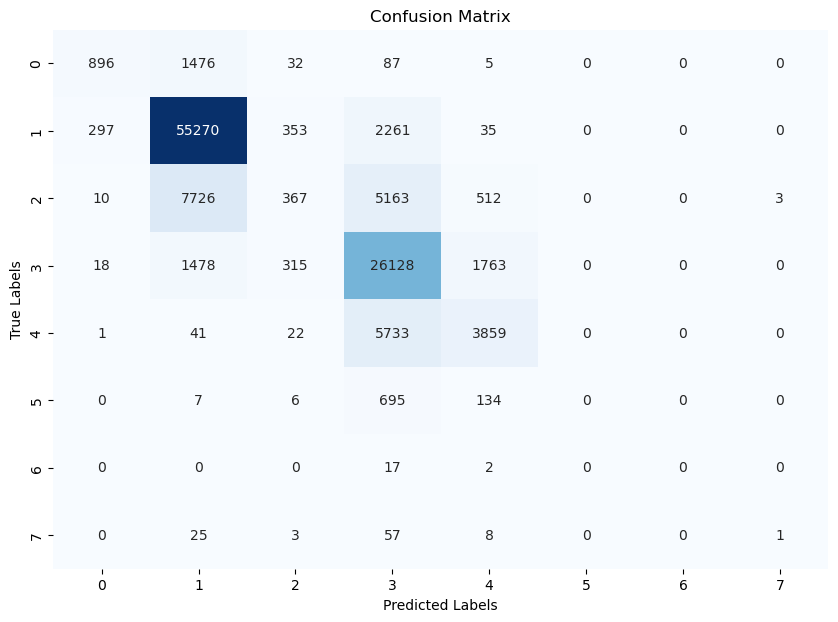

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val_encoded, y_pred_val)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

#### Export Submission CSV file

In [ ]:
test = enc2.inverse_transform(y_pred_test)
test

In [ ]:
## formating the submission file
X_test['Claim Injury Type'] = test
sample_submission = X_test[['Claim Injury Type']].set_index(X_test.index)
sample_submission.to_csv('submission_logistic regression_outliers.csv')
